In [2]:
%env GDAL_DATA=/usr/local/share/gdal

env: GDAL_DATA=/usr/local/share/gdal


In [3]:
import glob
import os

import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib

import warnings
warnings.filterwarnings("ignore")

import yaml

%matplotlib inline

plt.rcParams["figure.figsize"] = [16, 10]

## Normalize JSON turnout data

https://vt.ncsbe.gov/RegStat/

In [4]:
ls -lah data/registration

total 2136
drwxr-xr-x  39 mookerji  staff   1.2K Sep 19 16:03 ./
drwxr-xr-x  20 mookerji  staff   640B Sep 10 19:49 ../
-rw-r--r--   1 mookerji  staff    26K Aug  7 18:35 02-25-2020.json
-rw-r--r--   1 mookerji  staff    28K Sep  6 10:30 02-27-2016.json
-rw-r--r--   1 mookerji  staff    26K Aug  7 18:34 02-29-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:11 03-03-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:11 03-07-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:10 03-14-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:09 03-21-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:08 03-28-2020.json
-rw-r--r--   1 mookerji  staff    27K Jul 27 22:07 04-04-2020.json
-rw-r--r--   1 mookerji  staff    27K Jul 27 22:06 04-11-2020.json
-rw-r--r--   1 mookerji  staff    27K Jul 27 22:06 04-18-2020.json
-rw-r--r--@  1 mookerji  staff    27K Jul 27 21:18 04-25-2020.json

-rw-r--r--@  1 mookerji  staff    27K Jul 27 21:18 05-09-2020.json
-rw-r--r

In [6]:
glob.glob('data/registration/*.json')

['data/registration/03-14-2020.json',
 'data/registration/03-21-2020.json',
 'data/registration/08-01-2020.json',
 'data/registration/02-27-2016.json',
 'data/registration/08-15-2020.json',
 'data/registration/07-11-2020.json',
 'data/registration/09-12-2020.json',
 'data/registration/04-18-2020.json',
 'data/registration/07-25-2020.json',
 'data/registration/06-23-2020.json',
 'data/registration/07-04-2020.json',
 'data/registration/03-07-2020.json',
 'data/registration/02-25-2020.json',
 'data/registration/06-13-2020.json',
 'data/registration/08-22-2020.json',
 'data/registration/09-05-2020.json',
 'data/registration/07-18-2020.json',
 'data/registration/05-09-2020.json',
 'data/registration/05-16-2020.json',
 'data/registration/08-08-2020.json',
 'data/registration/04-04-2020.json',
 'data/registration/05-02-2020.json',
 'data/registration/09-03-2016.json',
 'data/registration/04-25-2020.json',
 'data/registration/06-20-2020.json',
 'data/registration/05-23-2020.json',
 'data/regis

In [5]:
PARTIES = ['registered.democrats(count)', 
           'registered.republicans(count)', 
           'registered.libertarians(count)', 
           'registered.green(count)', 
           'registered.constitution(count)', 
           'registered.unaffiliated(count)', 
           'registered.total(count)']

rename = {'Democrats': 'registered.democrats(count)', 
          'Republicans': 'registered.republicans(count)', 
          'Libertarians': 'registered.libertarians(count)', 
          'Green': 'registered.green(count)',
          'Constitution': 'registered.constitution(count)', 
          'Unaffiliated': 'registered.unaffiliated(count)', 
          'White': 'registered.white(count)', 
          'Black': 'registered.black(count)', 
          'AmericanIndian': 'registered.american_indian(count)',
          'Other': 'registered.other(count)', 
          'Hispanic': 'registered.hispanic(count)', 
          'Male': 'registered.male(count)', 
          'Female': 'registered.female(count)', 
          'UnDisclosedGender': 'registered.undisclosed_gender(count)', 
          'Total': 'registered.total(count)'}

def registrations_to_csv(year='2020'):
    files = glob.glob('data/registration/*.json')
    data = []
    for f in files:
        if year not in f:
            continue
        df = pd.read_json(f)
        df['date'] = pd.to_datetime(f.split('/')[2].rstrip('.json'))
        data.append(df.rename(columns=rename))
    return pd.concat(data)

In [6]:
registrations = registrations_to_csv()
registrations.to_csv('data/registrations2020.csv', index=False)
registrations.head()

CountyName  registered.democrats(count)  registered.republicans(count)  \
0   ALAMANCE                        36792                          33375   
1  ALEXANDER                         5242                          10930   
2  ALLEGHANY                         2194                           2704   
3      ANSON                        10111                           2478   
4       ASHE                         4539                           8082   

   registered.libertarians(count)  registered.green(count)  \
0                             556                       17   
1                              91                        1   
2                              33                        2   
3                              29                        7   
4                              76                        3   

   registered.constitution(count)  registered.unaffiliated(count)  \
0                              42                           31955   
1                              15                            7518   
2                               1                            2259   
3                              24                            3372   
4                               7                            5660   

   registered.white(count)  registered.black(count)  \
0                    70181                    21076   
1                    21612                      931   
2                     6666                       73   
3                     6656                     6818   
4                    17504                      103   

   registered.american_indian(count)  registered.other(count)  \
0                                258                    11222   
1                                 35                     1219   
2                                  7                      447   
3                                 27                     2520   
4                                 21                      739   

   registered.hispanic(count)  registered.male(count)  \
0                        3998                   44020   
1                         334                   11145   
2                         177                    3330   
3                          82                    6205   
4                         208                    8491   

   registered.female(count)  registered.undisclosed_gender(count)  \
0                     53978                                  4739   
1                     12006                                   646   
2                      3606                                   257   
3                      7558                                  2258   
4                      9511                                   365   

   registered.total(count)       date  NativeHawaiian  
0                   102737 2020-03-14             NaN  
1                    23797 2020-03-14             NaN  
2                     7193 2020-03-14             NaN  
3                    16021 2020-03-14             NaN  
4                    18367 2020-03-14             NaN

In [7]:
registrations_2016 = registrations_to_csv(year='2016')
registrations_2016.to_csv('data/registrations2016.csv', index=False)
registrations_2016.head()

CountyName  registered.democrats(count)  registered.republicans(count)  \
0   ALAMANCE                        38016                          31482   
1  ALEXANDER                         6706                          10414   
2  ALLEGHANY                         2849                           2381   
3      ANSON                        12002                           2309   
4       ASHE                         5696                           7743   

   registered.libertarians(count)  registered.green(count)  \
0                             349                        0   
1                              56                        0   
2                              27                        0   
3                              16                        0   
4                              48                        0   

   registered.constitution(count)  registered.unaffiliated(count)  \
0                               0                           25060   
1                               0                            6513   
2                               0                            1947   
3                               0                            2700   
4                               0                            4812   

   registered.white(count)  registered.black(count)  \
0                    68828                    19382   
1                    22107                     1000   
2                     6914                       83   
3                     7529                     7626   
4                    17901                       97   

   registered.american_indian(count)  NativeHawaiian  registered.other(count)  \
0                                231               0                     6466   
1                                 31               0                      551   
2                                 10               0                      197   
3                                 35               0                     1837   
4                                 21               0                      280   

   registered.hispanic(count)  registered.male(count)  \
0                        2093                   41453   
1                         205                   11303   
2                         146                    3389   
3                          58                    6948   
4                         144                    8646   

   registered.female(count)  registered.undisclosed_gender(count)  \
0                     51269                                  2185   
1                     12237                                   149   
2                      3768                                    47   
3                      8282                                  1797   
4                      9597                                    56   

   registered.total(count)       date  
0                    94907 2016-02-27  
1                    23689 2016-02-27  
2                     7204 2016-02-27  
3                    17027 2016-02-27  
4                    18299 2016-02-27

In [8]:
registrations.columns

Index(['CountyName', 'registered.democrats(count)',
       'registered.republicans(count)', 'registered.libertarians(count)',
       'registered.green(count)', 'registered.constitution(count)',
       'registered.unaffiliated(count)', 'registered.white(count)',
       'registered.black(count)', 'registered.american_indian(count)',
       'registered.other(count)', 'registered.hispanic(count)',
       'registered.male(count)', 'registered.female(count)',
       'registered.undisclosed_gender(count)', 'registered.total(count)',
       'date'],
      dtype='object')

In [9]:
ls -lah data/changes/

total 10624
drwxr-xr-x   3 mookerji  staff    96B Aug  9 18:25 ./
drwxr-xr-x  17 mookerji  staff   544B Aug 14 21:47 ../
-rw-r--r--@  1 mookerji  staff   5.2M Aug  9 17:20 2020_party_change_list.csv


In [8]:
def parse_party_changes():
    rename = {'UNA': 'unaffiliated', 
          'DEM': 'democrats', 
          'REP': 'republicans', 
          'LIB': 'libertarians', 
          'CST': 'constitution', 
          'GRE': 'green'}
    changes_df = pd.read_csv('data/changes/2020_party_change_list.csv')
    changes_df['date'] = pd.to_datetime(changes_df.change_dt)
    changes_df.drop(labels=['change_dt', 'voter_reg_num', 'year_change', 'county_id'], axis=1, inplace=True)
    changes_df['party_from'] = changes_df['party_from'].apply(rename.get)
    changes_df['party_to'] = changes_df['party_to'].apply(rename.get)
    changes_df['event'] = changes_df['party_from'] +'-to-'+ changes_df['party_to']
    changes_df['county_name'] = changes_df[' county_name']
    # There must be a better way to do this...
    changes_df['net_democrats'] = 0
    changes_df['net_republicans'] = 0
    changes_df['net_unaffiliated'] = 0
    changes_df['net_other'] = 0
    for p in ['democrats', 'republicans', 'unaffiliated']:
        changes_df[f'net_{p}'] += -1*(changes_df['party_from'] == p).astype('int')
        changes_df[f'net_{p}'] += (changes_df['party_to'] == p).astype('int')
    for p in ['libertarians', 'green', 'constitution']: 
        changes_df['net_other'] += -1*(changes_df['party_from'] == p).astype('int')
        changes_df['net_other'] += (changes_df['party_to'] == p).astype('int')
    return changes_df.drop(labels=[' county_name'], axis=1)

In [9]:
party_changes = parse_party_changes()
party_changes.to_csv('data/party-changes-2020.csv')
party_changes

party_from      party_to       date                        event  \
0          democrats  unaffiliated 2020-08-07    democrats-to-unaffiliated   
1          democrats  unaffiliated 2020-08-07    democrats-to-unaffiliated   
2          democrats   republicans 2020-08-07     democrats-to-republicans   
3        republicans  unaffiliated 2020-08-07  republicans-to-unaffiliated   
4       unaffiliated     democrats 2020-08-07    unaffiliated-to-democrats   
...              ...           ...        ...                          ...   
136696   republicans  unaffiliated 2020-08-27  republicans-to-unaffiliated   
136697  unaffiliated   republicans 2020-08-28  unaffiliated-to-republicans   
136698   republicans  unaffiliated 2020-08-28  republicans-to-unaffiliated   
136699  unaffiliated     democrats 2020-08-28    unaffiliated-to-democrats   
136700     democrats   republicans 2020-08-28     democrats-to-republicans   

       county_name  net_democrats  net_republicans  net_unaffiliated  \
0         ALAMANCE             -1                0                 1   
1         ALAMANCE             -1                0                 1   
2         ALAMANCE             -1                1                 0   
3         ALAMANCE              0               -1                 1   
4         ALAMANCE              1                0                -1   
...            ...            ...              ...               ...   
136696      YANCEY              0               -1                 1   
136697      YANCEY              0                1                -1   
136698      YANCEY              0               -1                 1   
136699      YANCEY              1                0                -1   
136700      YANCEY             -1                1                 0   

        net_other  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
136696          0  
136697          0  
136698          0  
136699          0  
136700          0  

[136701 rows x 9 columns]

In [1128]:
party_changes.date.sort_values().tail()

135181   2020-08-31
135180   2020-08-31
135179   2020-08-31
135177   2020-08-31
64500    2020-08-31
Name: date, dtype: datetime64[ns]

## Absentees / VBM

https://dl.ncsbe.gov/index.html?prefix=ENRS/2020_11_03/

In [1156]:
ls -lah limbo/

total 16432
drwxr-xr-x   7 mookerji  staff   224B Sep  5 15:33 ./
drwxr-xr-x  31 mookerji  staff   992B Sep  5 18:42 ../
-rw-r--r--@  1 mookerji  staff   8.0M Sep  5 15:46 absentee_demo_stats_20201103.csv
-rw-r--r--   1 mookerji  staff   6.2K Sep  5 15:33 notes.md
-rw-r--r--   1 mookerji  staff   6.0K Aug 21 19:36 notes.md~
-rw-r--r--   1 mookerji  staff   1.1K Sep  5 15:33 vopro-notes.md
-rw-r--r--   1 mookerji  staff    29B Sep  3 14:26 vopro-notes.md~


In [48]:
def read_absentee_req(start_date = '2020-01-01'):
    df = pd.read_csv('limbo/absentee_demo_stats_20201103.csv', parse_dates=['election_dt'])
    df['request_week_date'] = pd.to_datetime('2020-01-01') + df['request_week_num'].apply(lambda t: pd.Timedelta(weeks=t))
    final_date = pd.datetime.now() + pd.Timedelta(weeks=1)
    df = df[(df['request_week_date'] <= final_date) & (df['request_week_date'] >= start_date)]
    other = ['GREEN', 'LIBERTARIAN', 'CONSTITUTION']
    df['party_desc'] = df['party_desc'].apply(lambda t: 'other' if t in other else t)   
    return df.sort_values(by='request_week_date')

In [49]:
absentee2020_req = read_absentee_req()
absentee2020_req.head()

county_id   county_name election_dt    party_desc     race_desc  \
97659         88  TRANSYLVANIA  2020-11-03  UNAFFILIATED         WHITE   
5827          11      BUNCOMBE  2020-11-03    DEMOCRATIC         WHITE   
91264         80         ROWAN  2020-11-03    DEMOCRATIC  UNDESIGNATED   
5600          11      BUNCOMBE  2020-11-03    DEMOCRATIC         WHITE   
17756         20      CHEROKEE  2020-11-03  UNAFFILIATED  UNDESIGNATED   

                    ethncity_desc gender_desc    age_range  request_year  \
97659  NOT HISPANIC or NOT LATINO      FEMALE  Age 18 - 25          2020   
5827                 UNDESIGNATED        MALE  Age Over 65          2020   
91264                UNDESIGNATED        MALE  Age 41 - 65          2020   
5600   NOT HISPANIC or NOT LATINO        MALE  Age Over 65          2020   
17756                UNDESIGNATED      FEMALE  Age 41 - 65          2020   

       request_week_num  group_count request_week_date  
97659                 1            1        2020-01-08  
5827                  1            1        2020-01-08  
91264                 1            1        2020-01-08  
5600                  1            1        2020-01-08  
17756                 1            1        2020-01-08

## Shapefile

In [13]:
def load_shapefile_counties():
    nc_shapefile = "data/shapefiles/NC_Counties-shp/counties.shp"
    nc_shape = gpd.read_file(nc_shapefile).set_index('CO_NAME', drop=False).rename(columns={'CO_NAME': 'CountyName'})
    nc_shape['land.area(square_miles)'] = nc_shape['ACRES']/640.
    return nc_shape

nc_shape = load_shapefile_counties()
nc_shape.head()

FID  OBJECTID      PERIMETER  CountyName CO_ABBR          ACRES  \
CO_NAME                                                                       
ROCKINGHAM    1       1.0  156472.984375  ROCKINGHAM    ROCK  366053.062500   
GUILFORD      2       2.0  166183.500000    GUILFORD    GUIL  420968.937500   
ALAMANCE      3       3.0  143114.546875    ALAMANCE    ALAM  278127.031250   
ALEXANDER     4       4.0  116938.171875   ALEXANDER    ALEX  168640.984375   
RANDOLPH      5       5.0  180894.171875    RANDOLPH    RAND  505667.968750   

               Shape_Leng    RO     SHAPE_Le_1    SHAPE_Area  \
CO_NAME                                                        
ROCKINGHAM  513361.787377  WSRO  194502.424760  1.594526e+10   
GUILFORD    545220.367738  WSRO  205797.586927  1.833739e+10   
ALAMANCE    469534.986553  WSRO  177272.968717  1.211521e+10   
ALEXANDER   383654.655146   MRO  144599.548259  7.345997e+09   
RANDOLPH    593483.622166  WSRO  223033.815060  2.202688e+10   

                                                     geometry  \
CO_NAME                                                         
ROCKINGHAM  POLYGON ((-8853514.087 4333890.334, -8854417.1...   
GUILFORD    POLYGON ((-8909472.546 4336065.305, -8906846.4...   
ALAMANCE    POLYGON ((-8853514.087 4333890.334, -8853463.1...   
ALEXANDER   POLYGON ((-9020123.382 4306915.833, -9017719.5...   
RANDOLPH    POLYGON ((-8910804.874 4289745.058, -8906021.2...   

            land.area(square_miles)  
CO_NAME                              
ROCKINGHAM               571.957910  
GUILFORD                 657.763965  
ALAMANCE                 434.573486  
ALEXANDER                263.501538  
RANDOLPH                 790.106201

In [14]:
nc_shapefile = "data/shapefiles/HB 1020 H Red Comm CSBK-25_Shapefile/HB 1020 H Red Comm CSBK-25.shp"
gpd.read_file(nc_shapefile).set_index('DISTRICT')

geometry
DISTRICT                                                   
1         POLYGON ((850157.570 313952.432, 850174.392 31...
10        POLYGON ((700251.524 185408.186, 700232.723 18...
109       POLYGON ((402901.840 158912.067, 402916.417 15...
110       POLYGON ((416839.438 185947.087, 416909.408 18...
83        POLYGON ((453343.349 180266.149, 453459.859 18...
...                                                     ...
95        POLYGON ((431906.244 201186.535, 431906.014 20...
96        POLYGON ((385468.298 212052.037, 385703.596 21...
97        POLYGON ((419416.038 185772.740, 418521.122 18...
114       POLYGON ((258143.304 220772.364, 258163.948 22...
40        POLYGON ((621314.332 234913.948, 621314.423 23...

[120 rows x 1 columns]

In [15]:
def load_shapefile_districts():
    nc_shapefile = "data/shapefiles/HB 1020 H Red Comm CSBK-25_Shapefile/HB 1020 H Red Comm CSBK-25.shp"
    return gpd.read_file(nc_shapefile).set_index('DISTRICT')
    return nc_shape

nc_districts = load_shapefile_districts()
nc_districts.head()

geometry
DISTRICT                                                   
1         POLYGON ((850157.570 313952.432, 850174.392 31...
10        POLYGON ((700251.524 185408.186, 700232.723 18...
109       POLYGON ((402901.840 158912.067, 402916.417 15...
110       POLYGON ((416839.438 185947.087, 416909.408 18...
83        POLYGON ((453343.349 180266.149, 453459.859 18...

In [4]:
import fiona 

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

with fiona.drivers():
    nc_districts.to_file('data/shapefiles/nc_districts_tmp.kml', driver='KML')
    
# ogr2ogr -f KML -simplify 0.00001 data/shapefiles/nc_districts_simplifieda.kml data/shapefiles/nc_districts.kml

## CVAP (estimate)

https://data.census.gov/cedsci/table?q=B05003&g=0400000US37,37.050000&tid=ACSDT5Y2018.B05003&vintage=2014&y=2018

In [12]:
ls -lah data/cvap/

total 16
drwxr-xr-x  10 mookerji  staff   320B Aug  9 14:37 ./
drwxr-xr-x  17 mookerji  staff   544B Aug 14 21:47 ../
-rw-r--r--@  1 mookerji  staff   6.0K Aug  9 14:33 .DS_Store
drwxr-xr-x@  8 mookerji  staff   256B Jul 28 18:18 productDownload_2020-07-28T211825/
drwxr-xr-x@  8 mookerji  staff   256B Aug  7 22:00 productDownload_2020-08-08T010026/
drwx------@  8 mookerji  staff   256B Aug  9 14:03 productDownload_2020-08-09T170305/
drwx------@  8 mookerji  staff   256B Aug  9 14:25 productDownload_2020-08-09T172511/
drwx------@  8 mookerji  staff   256B Aug  9 14:33 productDownload_2020-08-09T173308/
drwx------@  8 mookerji  staff   256B Aug  9 14:35 productDownload_2020-08-09T173516/
drwx------@  8 mookerji  staff   256B Aug  9 14:37 productDownload_2020-08-09T173721/


In [16]:
cols = ['Estimate!!Total!!Female!!18 years and over!!Foreign born!!Naturalized U.S. citizen',
        'Estimate!!Total!!Female!!18 years and over!!Native',
        'Estimate!!Total!!Male!!18 years and over!!Foreign born!!Naturalized U.S. citizen',
        'Estimate!!Total!!Male!!18 years and over!!Native',
       ] 

def read_cvap_data(filename, col='cvap.all_races(count)'):
    cvap_df = pd.read_csv(filename, skiprows=1)
    cvap_df['CountyName'] = cvap_df['Geographic Area Name'].apply(lambda t: t.replace(' County, North Carolina', '').upper())
    cvap_df.set_index('CountyName', inplace=True, drop=False)
    cvap_df[col] = cvap_df[cols].sum(axis=1)
    cvap_df.drop('NORTH CAROLINA', inplace=True)
    return cvap_df[[col, 'CountyName']]

In [17]:
filename = 'data/cvap/productDownload_2020-07-28T211825/ACSDT5Y2018.B05003_data_with_overlays_2020-07-28T211821.csv'
cvap_df = read_cvap_data(filename)
cvap_df.to_csv('data/cvap2020_all_races.csv', index=False)
cvap_df

cvap.all_races(count) CountyName
CountyName                                  
MITCHELL                    11930   MITCHELL
GREENE                      15373     GREENE
CHOWAN                      11146     CHOWAN
CALDWELL                    63099   CALDWELL
CATAWBA                    115407    CATAWBA
...                           ...        ...
DAVIDSON                   122830   DAVIDSON
HERTFORD                    18989   HERTFORD
PENDER                      44201     PENDER
WATAUGA                     46205    WATAUGA
TYRRELL                      3507    TYRRELL

[100 rows x 2 columns]

In [18]:
cvap_aa_df = read_cvap_data('data/cvap/productDownload_2020-08-08T010026/ACSDT5Y2018.B05003B_data_with_overlays_2020-08-08T005955.csv', 
                            col='cvap.black_aa(count)' )
cvap_aa_df.to_csv('data/cvap2020_black_aa.csv', index=False)
cvap_aa_df.head()

cvap.black_aa(count) CountyName
CountyName                                 
MITCHELL                      53   MITCHELL
GREENE                      6093     GREENE
CHOWAN                      3774     CHOWAN
CALDWELL                    2933   CALDWELL
CATAWBA                     9832    CATAWBA

In [19]:
cvap_white_df = read_cvap_data('data/cvap/productDownload_2020-08-09T170305/ACSDT5Y2018.B05003H_data_with_overlays_2020-08-09T170249.csv', 
                               col='cvap.white(count)' )
cvap_white_df.to_csv('data/cvap2020_white.csv', index=False)
cvap_white_df.head()

cvap.white(count) CountyName
CountyName                              
MITCHELL                11452   MITCHELL
GREENE                   8262     GREENE
CHOWAN                   7057     CHOWAN
CALDWELL                58071   CALDWELL
CATAWBA                 96398    CATAWBA

In [20]:
cvap = cvap_df.join(cvap_aa_df, rsuffix='_r').drop(['CountyName_r'], axis=1).join(cvap_white_df, rsuffix='_r').drop(['CountyName_r'], axis=1)
cvap['pct_cvap.black_aa(%)'] = 100*cvap['cvap.black_aa(count)']/cvap['cvap.all_races(count)']
cvap['pct_cvap.white(%)'] = 100*cvap['cvap.white(count)']/cvap['cvap.all_races(count)']
cvap['pct_cvap.all_races.within_state(%)'] = 100*cvap['cvap.all_races(count)']/cvap['cvap.all_races(count)'].sum()
cvap.to_csv('data/cvap2020.csv', index=False)
cvap.head()

cvap.all_races(count) CountyName  cvap.black_aa(count)  \
CountyName                                                           
MITCHELL                    11930   MITCHELL                    53   
GREENE                      15373     GREENE                  6093   
CHOWAN                      11146     CHOWAN                  3774   
CALDWELL                    63099   CALDWELL                  2933   
CATAWBA                    115407    CATAWBA                  9832   

            cvap.white(count)  pct_cvap.black_aa(%)  pct_cvap.white(%)  \
CountyName                                                               
MITCHELL                11452              0.444258          95.993294   
GREENE                   8262             39.634424          53.743576   
CHOWAN                   7057             33.859681          63.314193   
CALDWELL                58071              4.648251          92.031569   
CATAWBA                 96398              8.519414          83.528729   

            pct_cvap.all_races.within_state(%)  
CountyName                                      
MITCHELL                              0.160930  
GREENE                                0.207374  
CHOWAN                                0.150354  
CALDWELL                              0.851173  
CATAWBA                               1.556781

In [21]:
cvap.to_csv('data/cvap2020.csv', index=False)

In [324]:
cvap.columns

Index(['cvap.all_races(count)', 'CountyName', 'cvap.black_aa(count)',
       'cvap.white(count)', 'pct_cvap.black_aa(%)', 'pct_cvap.white(%)',
       'pct_cvap.all_races.within_state(%)'],
      dtype='object')

### One-Stop Locations

In [1529]:
def read_one_stop(filename):
    df = pd.read_csv(filename, header=None, error_bad_lines=False, 
                 engine='c',  sep='\t', parse_dates=[6])
    names = {0: 'election_date', 1: 'CountyName', 3: 'LocationName', 4: 'Address1', \
             5: 'Address2', 6: 'date', 7: 'hours'}
    df = df.rename(columns=names)
    df['hours_date'] = df[['date', 'hours']].apply(lambda t: ', '.join([t[0].strftime('%D'), t[1]]), axis=1)
    grouped = []
    for location, loc_group in df.groupby(['Address1', 'Address2']):
        record = {'County': loc_group.CountyName.unique()[0], 
                  'LocationName': loc_group.LocationName.unique()[0],
                  'Address': location[0] + ', ' + location[1],
                  'Dates': loc_group.hours_date.str.cat(sep='\n '),
                 }
        grouped.append(record)
    return pd.DataFrame(grouped)

In [1551]:
one_stop = read_one_stop('data/one-stop-absentee/StatewideList.txt')
one_stop.to_csv('data/one-stop-absentee.csv', index=False)
one_stop.head()

County                            LocationName  \
0       UNION                      MONROE HIGH SCHOOL   
1    BUNCOMBE  UNIVERSITY OF NORTH CAROLINA ASHEVILLE   
2    MITCHELL            SPRUCE PINE FIRE DE3PARTMENT   
3    CARTERET    FORT BENJAMIN PARK RECREATION CENTER   
4  WASHINGTON           WASHINGTON COUNTY ROPER ANNEX   

                                       Address  \
0           1 HIGH SCHOOL DR, MONROE, NC 28112   
1        1 UNIVERSITY HTS, ASHEVILLE, NC 28804   
2  100 FIRE FIGHTER WAY, SPRUCE PINE, NC 28777   
3           100 MCQUEEN AVE, NEWPORT, NC 28570   
4           100 NC HWY 32 NCK, ROPER, NC 27970   

                                               Dates  
0  10/15/20, 8:00AM - 7:30PM\n 10/16/20, 8:00AM -...  
1  10/15/20, 8:00AM - 7:30PM\n 10/16/20, 8:00AM -...  
2  10/15/20, 8:00AM - 7:30PM\n 10/16/20, 8:00AM -...  
3  10/15/20, 8:00AM - 7:30PM\n 10/16/20, 8:00AM -...  
4  10/15/20, 8:00AM - 7:30PM\n 10/16/20, 8:00AM -...

## Post-processed

In [22]:
nc_shape['land.area(square_miles)']

CO_NAME
ROCKINGHAM     571.957910
GUILFORD       657.763965
ALAMANCE       434.573486
ALEXANDER      263.501538
RANDOLPH       790.106201
                  ...    
ROWAN          523.566357
LINCOLN        307.111279
MECKLENBURG    549.385059
CABARRUS       364.636035
GASTON         363.585132
Name: land.area(square_miles), Length: 100, dtype: float64

In [23]:
def add_cvap(registrations, cvap, nc_shape):    
    cvap_cols = ['cvap.all_races(count)', 'CountyName', 'cvap.black_aa(count)',
                 'cvap.white(count)', 'pct_cvap.black_aa(%)', 'pct_cvap.white(%)',
                 'pct_cvap.all_races.within_state(%)']
    joined = registrations.join(cvap[cvap_cols], on='CountyName', rsuffix='_r').drop(labels='CountyName_r', axis=1)
    cols = ['CountyName', 'land.area(square_miles)']
    joined = joined.join(nc_shape[cols], on='CountyName', rsuffix='_r').drop(labels='CountyName_r', axis=1)
    joined['cvap.density(count/squaremiles)'] = joined['cvap.all_races(count)']/joined['land.area(square_miles)']
    for c in PARTIES:
        joined[c.replace('count', '%').replace('registered', 'registered_within_county_cvap')] = 100*joined[c]/joined['cvap.all_races(count)']
    parties = ['democrats', 'republicans', 'libertarians', 
               'green', 'constitution', 'unaffiliated']
    parties_col = {('registered_within_county_cvap.' + party + '(%)'): party for party in parties}
    winners = pd.DataFrame({'most_registrants(party)': joined[parties_col].idxmax(axis=1).apply(parties_col.get), 
                            'most_registered(%)': joined[parties_col].max(axis=1)})
    joined['pct_registered.within_race_cvap.black_aa(%)'] = 100*joined['registered.black(count)'] / joined['cvap.black_aa(count)']
    joined['pct_registered.among_all_races_cvap.black_aa(%)'] = 100*joined['registered.black(count)'] / joined['cvap.all_races(count)']
    joined['pct_registered.among_registered.black_aa(%)'] = 100*joined['registered.black(count)'] / joined['registered.total(count)']
    joined['pct_registered.within_race_cvap.white(%)'] = 100*joined['registered.white(count)'] / joined['cvap.white(count)']
    joined['pct_registered.among_all_races_cvap.white(%)'] = 100*joined['registered.white(count)'] / joined['cvap.all_races(count)']
    joined['pct_registered.among_registered.white(%)'] = 100*joined['registered.white(count)'] / joined['registered.total(count)']
    return pd.concat([joined, winners], axis=1)

In [24]:
joined = add_cvap(registrations, cvap, nc_shape)
joined.T

0   \
CountyName                                                  ALAMANCE   
registered.democrats(count)                                    36792   
registered.republicans(count)                                  33375   
registered.libertarians(count)                                   556   
registered.green(count)                                           17   
registered.constitution(count)                                    42   
registered.unaffiliated(count)                                 31955   
registered.white(count)                                        70181   
registered.black(count)                                        21076   
registered.american_indian(count)                                258   
registered.other(count)                                        11222   
registered.hispanic(count)                                      3998   
registered.male(count)                                         44020   
registered.female(count)                                       53978   
registered.undisclosed_gender(count)                            4739   
registered.total(count)                                       102737   
date                                             2020-03-14 00:00:00   
NativeHawaiian                                                   NaN   
cvap.all_races(count)                                         115973   
cvap.black_aa(count)                                           23370   
cvap.white(count)                                              84558   
pct_cvap.black_aa(%)                                         20.1512   
pct_cvap.white(%)                                            72.9118   
pct_cvap.all_races.within_state(%)                           1.56442   
land.area(square_miles)                                      434.573   
cvap.density(count/squaremiles)                              266.866   
registered_within_county_cvap.democrats(%)                   31.7246   
registered_within_county_cvap.republicans(%)                 28.7783   
registered_within_county_cvap.libertarians(%)               0.479422   
registered_within_county_cvap.green(%)                     0.0146586   
registered_within_county_cvap.constitution(%)              0.0362153   
registered_within_county_cvap.unaffiliated(%)                27.5538   
registered_within_county_cvap.total(%)                        88.587   
pct_registered.within_race_cvap.black_aa(%)                   90.184   
pct_registered.among_all_races_cvap.black_aa(%)              18.1732   
pct_registered.among_registered.black_aa(%)                  20.5145   
pct_registered.within_race_cvap.white(%)                     82.9975   
pct_registered.among_all_races_cvap.white(%)                 60.5149   
pct_registered.among_registered.white(%)                     68.3113   
most_registrants(party)                                    democrats   
most_registered(%)                                           31.7246   

                                                                  1   \
CountyName                                                 ALEXANDER   
registered.democrats(count)                                     5242   
registered.republicans(count)                                  10930   
registered.libertarians(count)                                    91   
registered.green(count)                                            1   
registered.constitution(count)                                    15   
registered.unaffiliated(count)                                  7518   
registered.white(count)                                        21612   
registered.black(count)                                          931   
registered.american_indian(count)                                 35   
registered.other(count)                                         1219   
registered.hispanic(count)                                       334   
registered.male(count)                                         11145   
registered.female(count)         

In [25]:
joined.to_csv('data/2020_registrations_demographics.csv', index=False)

In [26]:
def compute_changes(joined):
    diffs = []
    for county, df in joined.groupby('CountyName'):
        dfg = df.sort_values('date').set_index('date').drop(['CountyName', 'most_registrants(party)'], axis=1)
        dfh = dfg - dfg.iloc[0]
        dfh['CountyName'] = county
        # Constant across all dates, but keep them around for convenience
        fixed_demographics = [
            'cvap.all_races(count)', 
            'cvap.black_aa(count)', 'pct_cvap.black_aa(%)',
            'cvap.white(count)', 'pct_cvap.white(%)',
            'pct_cvap.all_races.within_state(%)', 'cvap.density(count/squaremiles)',
        ]
        for d in fixed_demographics: 
            dfh[d] = dfg[d]
        diffs.append(dfh)
    changes = pd.concat(diffs)
    parties = ['democrats', 'republicans', 'libertarians', 
               'green', 'constitution', 'unaffiliated']
    parties_col = {('registered_within_county_cvap.' + party + '(%)'): party for party in parties}
    winners = pd.DataFrame({'most_new_registrants(party)': changes[parties_col].idxmax(axis=1).apply(parties_col.get), 
                            'most_new_registered(%)': changes[parties_col].max(axis=1)})
    return pd.concat([changes, winners], axis=1)

In [27]:
changes = compute_changes(joined)
changes.head()

registered.democrats(count)  registered.republicans(count)  \
date                                                                     
2020-02-25                          0.0                            0.0   
2020-02-29                          1.0                            6.0   
2020-03-03                         58.0                           23.0   
2020-03-07                         59.0                           22.0   
2020-03-14                        113.0                           36.0   

            registered.libertarians(count)  registered.green(count)  \
date                                                                  
2020-02-25                             0.0                      0.0   
2020-02-29                             0.0                      0.0   
2020-03-03                             0.0                      0.0   
2020-03-07                            -1.0                     -1.0   
2020-03-14                            -2.0                     -1.0   

            registered.constitution(count)  registered.unaffiliated(count)  \
date                                                                         
2020-02-25                             0.0                             0.0   
2020-02-29                             0.0                           -22.0   
2020-03-03                             0.0                             1.0   
2020-03-07                             0.0                            -3.0   
2020-03-14                            -2.0                             8.0   

            registered.white(count)  registered.black(count)  \
date                                                           
2020-02-25                      0.0                      0.0   
2020-02-29                      6.0                    -10.0   
2020-03-03                     70.0                      7.0   
2020-03-07                     66.0                      6.0   
2020-03-14                    116.0                     26.0   

            registered.american_indian(count)  registered.other(count)  ...  \
date                                                                    ...   
2020-02-25                                0.0                      0.0  ...   
2020-02-29                                1.0                    -12.0  ...   
2020-03-03                                1.0                      4.0  ...   
2020-03-07                                1.0                      3.0  ...   
2020-03-14                                2.0                      8.0  ...   

            pct_registered.within_race_cvap.black_aa(%)  \
date                                                      
2020-02-25                                     0.000000   
2020-02-29                                    -0.042790   
2020-03-03                                     0.029953   
2020-03-07                                     0.025674   
2020-03-14                                     0.111254   

            pct_registered.among_all_races_cvap.black_aa(%)  \
date                                                          
2020-02-25                                         0.000000   
2020-02-29                                        -0.008623   
2020-03-03                                         0.006036   
2020-03-07                                         0.005174   
2020-03-14                                         0.022419   

            pct_registered.among_registered.black_aa(%)  \
date                                                      
2020-02-25                                     0.000000   
2020-02-29                                    -0.006749   
2020-03-03                                    -0.009571   
2020-03-07                                    -0.009346   
2020-03-14                                    -0.005051   

            pct_registered.within_race_cvap.white(%)  \
date                                                   
2020-02-25                                  0.000000   
2020-02

In [28]:
changes.to_csv('data/2020_registrations_demographics_weekly_changes.csv', index=False)

In [29]:
last_date = changes.index[-1]
last_date

Timestamp('2020-09-19 00:00:00')

## Summary (stale)

In [94]:
def compute_change_no_demographics(registrations): 
    diffs = []
    for county, df in registrations.groupby('CountyName'):
        dfg = df.sort_values('date').set_index('date').drop(['CountyName'], axis=1)
        dfh = dfg - dfg.iloc[0]
        dfh['CountyName'] = county
        diffs.append(dfh)
    return pd.concat(diffs)

In [1449]:
absentee_2016 = pd.read_csv('limbo/absentee_20161108_w_ethnicity-stripped.csv', 
                            parse_dates=['ballot_req_dt', 'ballot_rtn_dt', 'ballot_rtn_status'])
absentee_counts = absentee_2016.groupby(pd.Grouper(key='ballot_req_dt', freq='W-SAT')).count().county_desc

col_parties = ['registered.democrats(count)',     
'registered.republicans(count)',  
'registered.libertarians(count)',
'registered.green(count)',
'registered.constitution(count)', 
'registered.unaffiliated(count)',
              'registered.total(count)']

changes2016 = compute_change_no_demographics(registrations_2016)

totals_2016 = changes2016.T[changes2016.index[-1]].T.sum().to_frame().T[col_parties]
totals_2020 = changes.T[last_date].T.sum().to_frame().T[col_parties]
cols = ['registered.libertarians(count)','registered.green(count)','registered.constitution(count)']
totals_2020['registered.other(count)'] = totals_2020[cols].sum(axis=1)
cols_ = {'registered.democrats(count)': "Democrats",     
'registered.republicans(count)': 'Republicans',  
'registered.unaffiliated(count)': 'Unaffiliated',
         'registered.other(count)': 'Other',
              'registered.total(count)': 'Total'}
registration_totals = totals_2020.drop(labels=cols, axis=1).rename(columns=cols_)
registration_totals['Total (2016)'] = totals_2016['registered.total(count)']

cols_party = ['DEMOCRATIC','REPUBLICAN','UNAFFILIATED','other']
latest_absentee_ = latest_absentee[cols_party].copy()
latest_absentee_['Total'] = latest_absentee_[cols_party].sum(axis=1)
absentee_totals = latest_absentee_.sum().to_frame().T.rename(columns={'DEMOCRATIC': 'Democrats',
                                                   'REPUBLICAN': 'Republicans', 
                                                   'UNAFFILIATED': 'Unaffiliated', 'other': 'Other'})
absentee_totals['Total (2016)'] = absentee_counts[(absentee_counts.index > '2016-01-01') & (absentee_counts.index  <= '2016-09-06')].cumsum().iloc[-1]

summary_table = pd.concat([registration_totals, absentee_totals])
summary_table.index = ['Registrations', 'VBM Requests']
summary_table[['Democrats', 'Republicans', 'Unaffiliated', 'Other', 'Total', 'Total (2016)']].to_html('_includes/tables/totals_summary.html')
summary_table

Democrats Republicans Unaffiliated   Total   Other Total (2016)
Registrations     25920       58844        73567  162125  3794.0       195140
VBM Requests     319538       95809       187832  604956  1777.0        34034

## Percentage Change vs CVAP

In [30]:
def plot_latest_change(changes, party, size_axis='cvap.all_races(count)'):
    dat = changes.T[last_date].T
    ax = dat.plot.scatter(x=size_axis, y=party, logx=True)
    dat[[size_axis, party,'CountyName']].apply(lambda row: ax.text(*row),axis=1)    

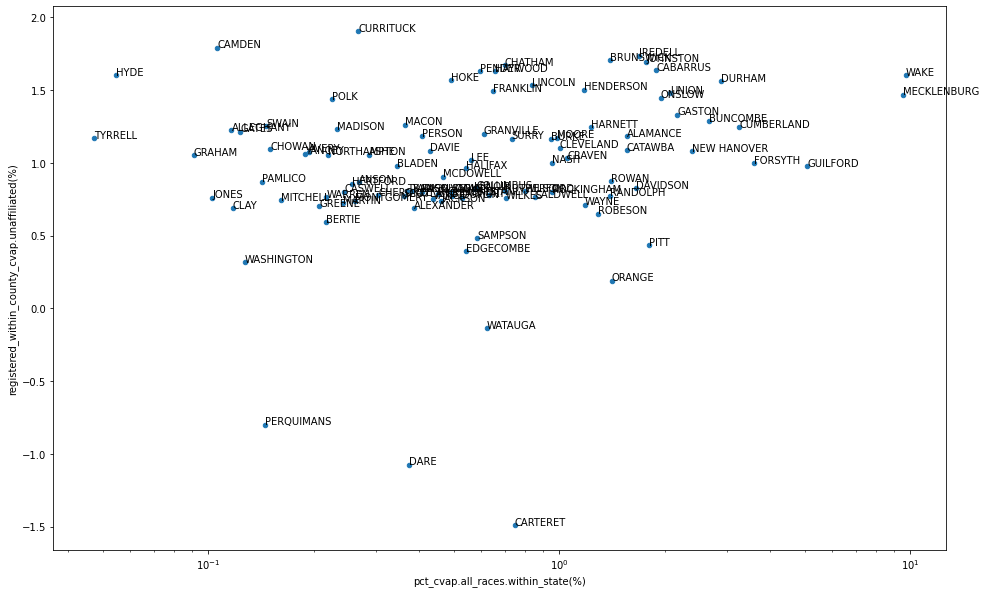

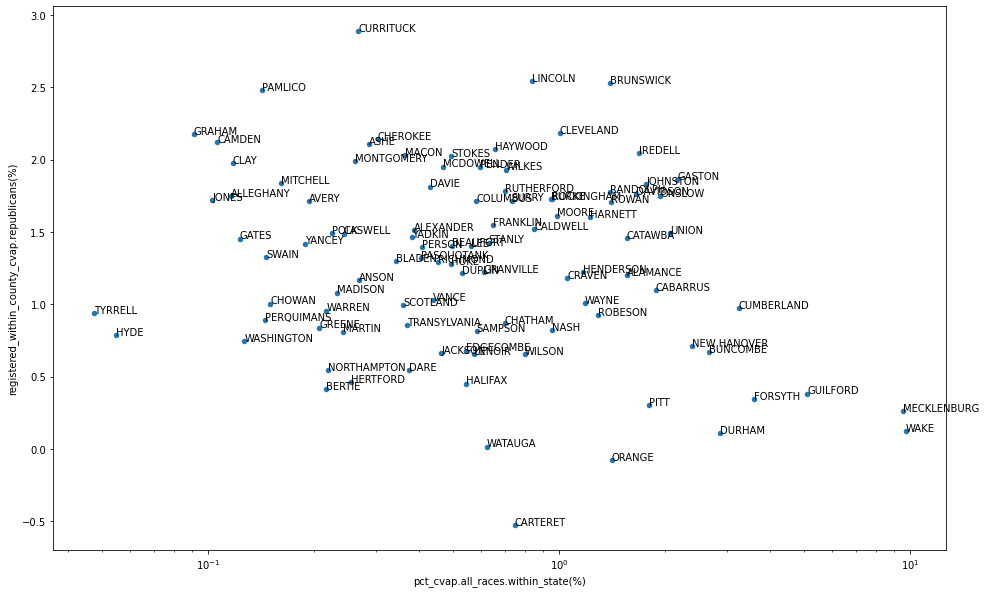

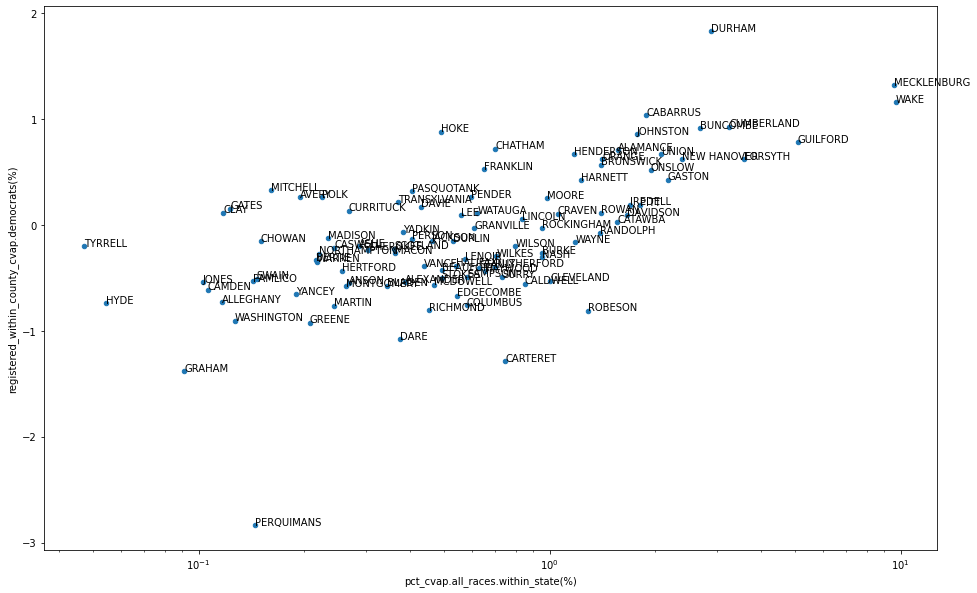

In [31]:
size_axis = 'pct_cvap.all_races.within_state(%)'
plot_latest_change(changes, 'registered_within_county_cvap.unaffiliated(%)', size_axis)
plot_latest_change(changes, 'registered_within_county_cvap.republicans(%)', size_axis)
plot_latest_change(changes, 'registered_within_county_cvap.democrats(%)', size_axis)

In [32]:
cols = ['CountyName', 
        'most_new_registered(%)', 'most_new_registrants(party)', 
        'pct_cvap.all_races.within_state(%)', 
        'registered_within_county_cvap.total(%)']
latest = changes[cols].T[last_date].T
latest

CountyName most_new_registered(%) most_new_registrants(party)  \
date                                                                       
2020-09-19   ALAMANCE                  1.202                 republicans   
2020-09-19  ALEXANDER                1.51245                 republicans   
2020-09-19  ALLEGHANY                1.74809                 republicans   
2020-09-19      ANSON                 1.1688                 republicans   
2020-09-19       ASHE                2.10576                 republicans   
...               ...                    ...                         ...   
2020-09-19      WAYNE                1.00627                 republicans   
2020-09-19     WILKES                1.93043                 republicans   
2020-09-19     WILSON               0.806207                unaffiliated   
2020-09-19     YADKIN                1.46581                 republicans   
2020-09-19     YANCEY                 1.4194                 republicans   

           pct_cvap.all_races.within_state(%)  \
date                                            
2020-09-19                            1.56442   
2020-09-19                            0.38619   
2020-09-19                           0.116522   
2020-09-19                           0.268913   
2020-09-19                           0.286989   
...                                       ...   
2020-09-19                            1.18504   
2020-09-19                            0.70577   
2020-09-19                           0.799792   
2020-09-19                           0.381914   
2020-09-19                           0.189123   

           registered_within_county_cvap.total(%)  
date                                               
2020-09-19                                3.14039  
2020-09-19                                1.73251  
2020-09-19                                 2.2922  
2020-09-19                                1.50489  
2020-09-19                                3.00823  
...                                           ...  
2020-09-19                                1.60503  
2020-09-19                                2.42546  
2020-09-19                                1.31557  
2020-09-19                                2.27819  
2020-09-19                                1.85449  

[100 rows x 5 columns]

In [33]:
latest['most_new_registrants(party)'].value_counts()

republicans     72
unaffiliated    24
democrats        3
constitution     1
Name: most_new_registrants(party), dtype: int64

In [35]:
colormap = {'registered_within_county_cvap.unaffiliated(%)': 'gray', 
            'registered_within_county_cvap.republicans(%)': 'red', 
            'registered_within_county_cvap.constitution(%)': 'black',
            'registered_within_county_cvap.green(%)': 'black', 
            'registered_within_county_cvap.democrats(%)': 'blue'}

def get_color(party): 
    return colormap.get('registered_within_county_cvap.' + party + '(%)')

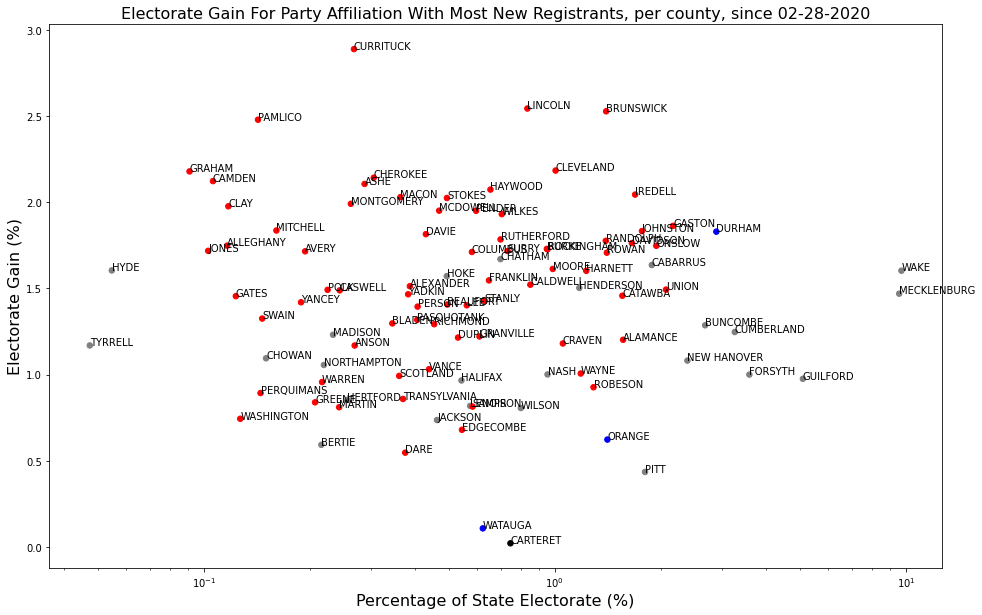

In [36]:
ax = latest.plot.scatter(x='pct_cvap.all_races.within_state(%)', 
                         y='most_new_registered(%)', 
                         c=latest['most_new_registrants(party)'].apply(get_color).values, s=30, logx=True)                               
latest[['pct_cvap.all_races.within_state(%)','most_new_registered(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
font_size = 16
ax.set_title(f'Electorate Gain For Party Affiliation With Most New Registrants, per county, since 02-28-2020', fontsize=font_size)
ax.set_ylabel('Electorate Gain (%)', fontsize=font_size)
ax.set_xlabel('Percentage of State Electorate (%)', fontsize=font_size)
ax.get_figure().savefig('assets/images/pct-new-electorate-change-vs-population.png', bbox_inches='tight')
ax

date
2020-08-08    Text(1.5644161393064597, 1.5727798711769196, '...
2020-08-08    Text(0.3861904896157264, 0.6496908728911137, '...
2020-08-08    Text(0.11652217853577297, 1.0071775874044988, ...
2020-08-08    Text(0.2689128998738868, 0.7173313268121433, '...
2020-08-08    Text(0.2869888108761947, 1.5605170387779026, '...
                                    ...                        
2020-08-08    Text(1.1850378400311554, 0.7843003335268435, '...
2020-08-08    Text(0.7057698982393658, 0.9690366972477023, '...
2020-08-08    Text(0.7997916144230122, 0.5633327711249763, '...
2020-08-08    Text(0.3819143226099565, 1.0172365074879934, '...
2020-08-08    Text(0.18912259123310224, 1.0627674750356704, ...
Length: 100, dtype: object

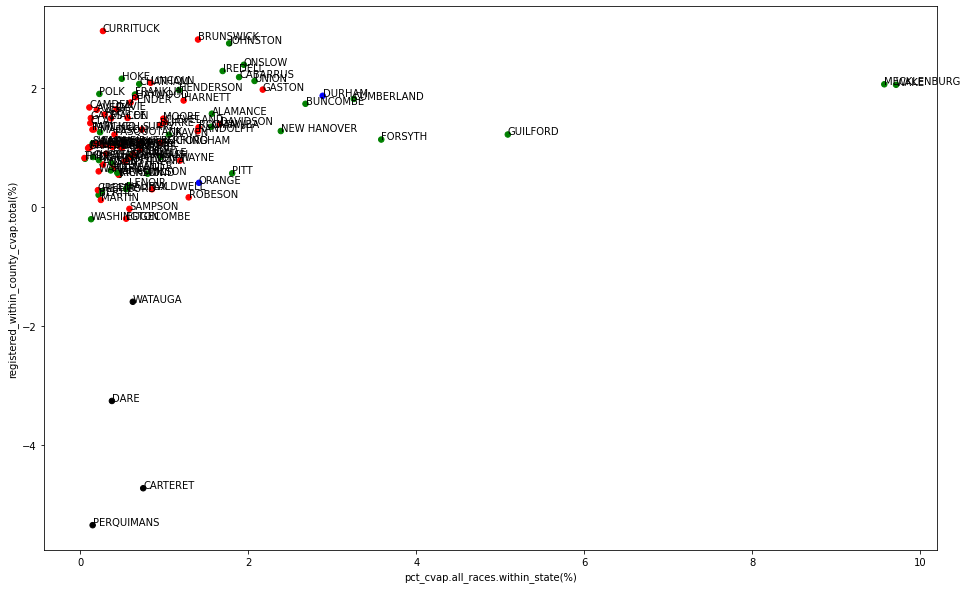

In [817]:
recent = changes.T[last_date].T
ax = recent.plot.scatter(x='pct_cvap.all_races.within_state(%)', 
                         y='registered_within_county_cvap.total(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)                               
recent[['pct_cvap.all_races.within_state(%)','registered_within_county_cvap.total(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)

0     Text(1.5644161393064597, 31.9177739646297, 'AL...
1     Text(0.3861904896157264, 38.63914212861085, 'A...
2     Text(0.11652217853577297, 32.032877981014124, ...
3     Text(0.2689128998738868, 50.268372209681466, '...
4     Text(0.2869888108761947, 39.01762632197415, 'A...
                            ...                        
95    Text(1.1850378400311554, 33.31512026317886, 'W...
96    Text(0.7057698982393658, 42.190366972477065, '...
97    Text(0.7997916144230122, 46.17473435655254, 'W...
98    Text(0.3819143226099565, 47.022463972873695, '...
99    Text(0.18912259123310224, 35.44935805991441, '...
Length: 100, dtype: object

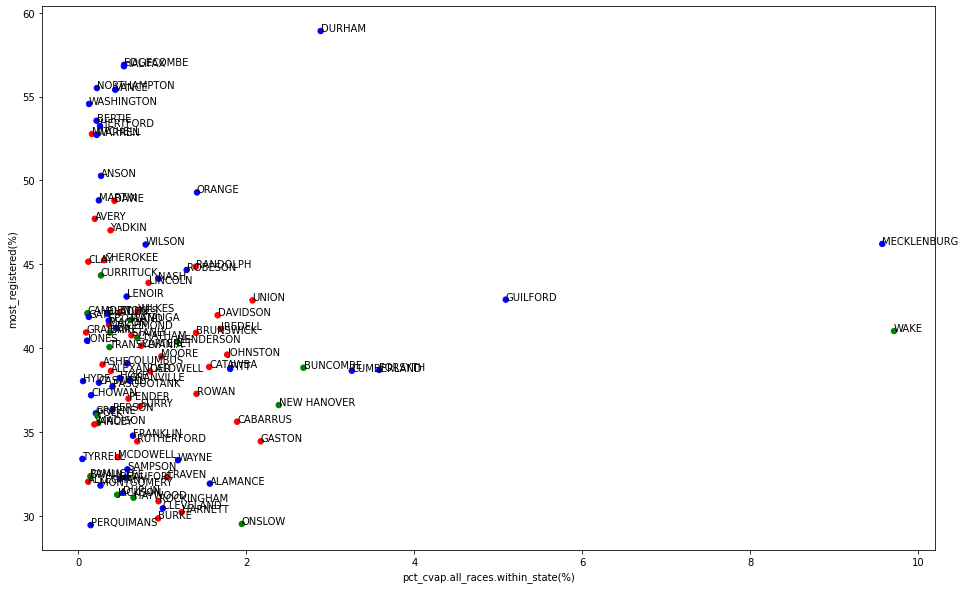

In [461]:
recent = joined[joined.date == last_date]
ax = recent.plot.scatter(x='pct_cvap.all_races.within_state(%)', 
                         y='most_registered(%)', 
                         c=recent['most_registrants(party)'].apply(get_color).values, s=30)                               
recent[['pct_cvap.all_races.within_state(%)','most_registered(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)

## Individual Counties

In [37]:
def generate_state_registrations(changes):
    plt.figure()
    ax = changes.reset_index().groupby('date')[PARTIES].sum().plot()
    ax.set_title(f'Cumulative New Voter Registrations since 02-28-2020, Statewide' )
    ax.set_ylabel('Net Registrations (count)')
    ax.get_figure().savefig('assets/images/statewide-registrations-by-party.png', bbox_inches='tight')
    plt.close(ax.get_figure())
    
def generate_county_registrations(changes):
    for county_name, county_data in changes.groupby('CountyName'):
        plt.figure()
        ax = county_data[PARTIES].plot()
        ax.set_title(f'Cumulative New Voter Registrations since 02-28-2020, {county_name.title()} County' )
        ax.set_ylabel('Net Registrations (count)')
        ax.get_figure().savefig('assets/images/county-registration-by-party/' + county_name.lower() + '.png', bbox_inches='tight')
        plt.close(ax.get_figure())

In [1176]:
#party_changes[party_changes.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W'))[cols].sum().cumsum().plot.bar(stacked=True)

In [596]:
#plt.figure()
#ax = changes.reset_index().groupby('date')[PARTIES].sum().plot()
#weekly = party_changes[party_changes.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W'))[cols].sum().cumsum()
#weekly.plot.bar(stacked=True, ax=ax)
#weekly.cumsum().plot.bar(stacked=True)
#gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'], ax=ax)
#ax.set_title(f'Cumulative New Voter Registrations since 02-28-2020, Statewide' )
#ax.set_ylabel('Net Registrations (count)')
#ax
#plt.figure()
#gg = party_changes[party_changes.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W'))[cols].sum().cumsum()
#ax = gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'])
#ax.set_title('Cumulative Party Affiliation Changes, since 02-28-2020')
#ax.set_ylabel('Net Change (count)')
#ax.set_xlabel('Date')
#ax.get_figure().savefig('assets/images/cumulative-party-affiliation-changes.png', bbox_inches='tight')
#ax

In [38]:
generate_state_registrations(changes)
generate_county_registrations(changes)

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

## Site Graphs Manifest

In [1896]:
def make_counties_manifest():
    manifest = {'counties': []}
    for county_name, county_data in changes.groupby('CountyName'):
        k =  county_name.lower().replace(' ', '_')
        image_name = 'assets/images/county-registration-by-party/' + k + '.png'
        change_name = 'assets/images/county-registration-changes/' + k + '.png'
        cumul_name = 'assets/images/cumulative-county-registration-changes/' + k + '.png'
        joined_name = 'assets/images/county-registration-and-changes-by-party/' + k + '.png'
        manifest['counties'].append({'county_name': county_name.lower().title(), 
                                     'county_id': k,
                                     'party_registration_graph': image_name, 
                                     'party_change_graph': change_name, 
                                     'party_cumulative_change_graph': cumul_name,
                                     'party_registration_changes_graph': joined_name})
    return manifest

def make_state_manifest():
    manifest = {'state': {}}
    manifest['state']['party_registration_graph'] = 'assets/images/statewide-registrations-by-party.png'
    manifest['state']['party_new_electorate_per_county_graph'] = 'assets/images/pct-new-electorate-change-vs-population.png'
    manifest['state']['party_registration_changes_graph'] = 'assets/images/weekly-party-affiliation-changes.png'
    manifest['state']['party_cumulative_registration_changes_graph'] = 'assets/images/cumulative-party-affiliation-changes.png'
    manifest['state']['statewide_registrations_changes_by_party'] = 'assets/images/statewide-registrations-changes-by-party.png'
    manifest['state']['statewide_registrations_by_county_density'] = 'assets/images/statewide-registrations-by-county-density.png'
    manifest['state']['statewide_vbm_requests_by_demographic'] = 'assets/images/statewide-vbm-requests-by-demographic.png'
    manifest['state']['statewide_vbm_requests_by_county'] = 'assets/images/statewide-vbm-requests-by-county.png'
    manifest['state']['statewide_vbm_requests_by_demographic_weekly'] = 'assets/images/statewide-vbm-requests-by-demographic-weekly.png'
    manifest['state']['statewide_vbm_rejections_by_county'] = 'assets/images/statewide-vbm-rejections-by-county.png'
    manifest['state']['statewide_vbm_submissions_by_county'] = 'assets/images/statewide-vbm-submissions-by-county.png'
    manifest['state']['statewide_vbm_rejected_by_demographic_weekly'] = 'assets/images/statewide-vbm-rejected-by-demographic-weekly.png'
    manifest['state']['statewide_vbm_rejected_by_demographic'] = 'assets/images/statewide-vbm-rejected-by-demographic.png'
    manifest['state']['statewide_vbm_submissions_by_demographic_weekly'] = 'assets/images/statewide-vbm-submissions-by-demographic-weekly.png'
    manifest['state']['statewide_vbm_submissions_by_demographic'] = 'assets/images/statewide-vbm-submissions-by-demographic.png'
    return manifest

In [1897]:
with open('_data/counties.yml', 'w+') as f:
    f.write(yaml.dump(make_counties_manifest()))
    
with open('_data/state.yml', 'w+') as f:
    f.write(yaml.dump(make_state_manifest()))

In [310]:
changes.T[last_date].T.set_index('CountyName').sort_values('cvap.all_races(count)')

registered.democrats(count) registered.republicans(count)  \
CountyName                                                              
TYRRELL                               0                            13   
HYDE                                -26                            20   
GRAHAM                              -67                            86   
JONES                               -43                            82   
CAMDEN                              -42                           101   
...                                 ...                           ...   
CUMBERLAND                         1199                          1302   
FORSYTH                             808                           221   
GUILFORD                           1696                           632   
MECKLENBURG                        6736                           978   
WAKE                               6412                           291   

            registered.libertarians(count) registered.green(count)  \
CountyName                                                           
TYRRELL                                  0                       0   
HYDE                                     1                       0   
GRAHAM                                  -4                       0   
JONES                                    7                       1   
CAMDEN                                  -3                       1   
...                                    ...                     ...   
CUMBERLAND                              92                      17   
FORSYTH                                 36                      10   
GUILFORD                                53                      29   
MECKLENBURG                            186                     100   
WAKE                                   141                      64   

            registered.constitution(count) registered.unaffiliated(count)  \
CountyName                                                                  
TYRRELL                                  1                             13   
HYDE                                     0                             44   
GRAHAM                                   2                             43   
JONES                                    0                             45   
CAMDEN                                   0                             93   
...                                    ...                            ...   
CUMBERLAND                              33                           1970   
FORSYTH                                 20                           1763   
GUILFORD                                20                           2558   
MECKLENBURG                             63                           8028   
WAKE                                    55                           9163   

            registered.white(count) registered.black(count)  \
CountyName                                                    
TYRRELL                           4                       3   
HYDE                              5                      -4   
GRAHAM                           31                       0   
JONES                            30                      -1   
CAMDEN                           69                      -1   
...                             ...                     ...   
CUMBERLAND                      596                     874   
FORSYTH                        -237                      94   
GUILFORD                        -78                     500   
MECKLENBURG                    2194                    2464   
WAKE                           1729                     778   

            registered.american_indian(count) registered.other(count)  ...  \
CountyName                                                             ...   
TYRRELL                                     0                      20  ...   
HYDE                                        0                      38  ...   
GRAHAM           

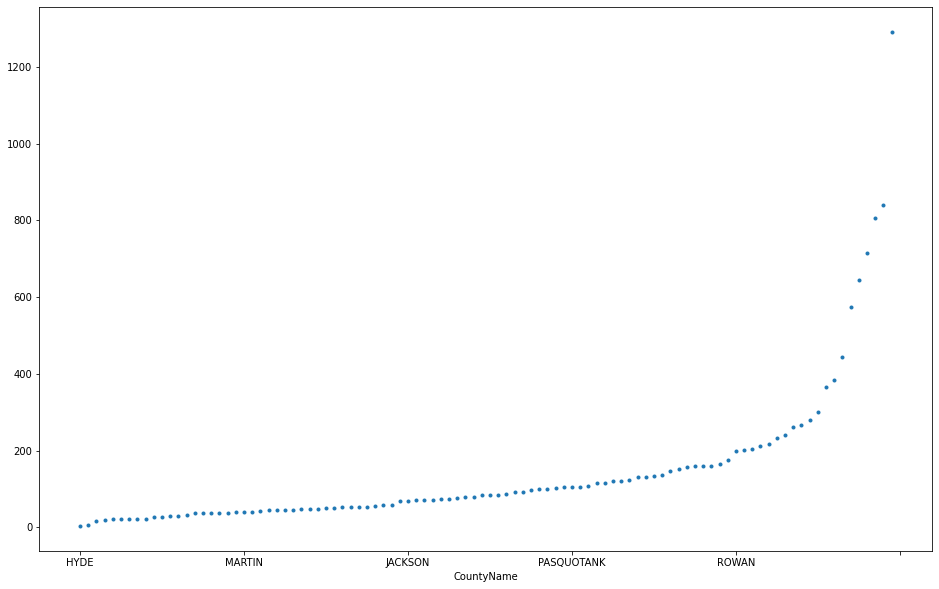

In [744]:
recent['cvap.density(count/squaremiles)'].sort_values().plot(style='.')

In [1586]:
changes.T

date                                            2020-02-25   2020-02-29  \
registered.democrats(count)                              0            1   
registered.republicans(count)                            0            6   
registered.libertarians(count)                           0            0   
registered.green(count)                                  0            0   
registered.constitution(count)                           0            0   
registered.unaffiliated(count)                           0          -22   
registered.white(count)                                  0            6   
registered.black(count)                                  0          -10   
registered.american_indian(count)                        0            1   
registered.other(count)                                  0          -12   
registered.hispanic(count)                               0            0   
registered.male(count)                                   0           -8   
registered.female(count)                                 0            2   
registered.undisclosed_gender(count)                     0           -9   
registered.total(count)                                  0          -15   
NativeHawaiian                                         NaN          NaN   
cvap.all_races(count)                               115973       115973   
cvap.black_aa(count)                                 23370        23370   
cvap.white(count)                                    84558        84558   
pct_cvap.black_aa(%)                               20.1512      20.1512   
pct_cvap.white(%)                                  72.9118      72.9118   
pct_cvap.all_races.within_state(%)                 1.56442      1.56442   
land.area(square_miles)                                  0            0   
cvap.density(count/squaremiles)                    266.866      266.866   
registered_within_county_cvap.democrats(%)               0   0.00086227   
registered_within_county_cvap.republicans(%)             0   0.00517362   
registered_within_county_cvap.libertarians(%)            0            0   
registered_within_county_cvap.green(%)                   0            0   
registered_within_county_cvap.constitution(%)            0            0   
registered_within_county_cvap.unaffiliated(%)            0   -0.0189699   
registered_within_county_cvap.total(%)                   0    -0.012934   
pct_registered.within_race_cvap.black_aa(%)              0   -0.0427899   
pct_registered.among_all_races_cvap.black_aa(%)          0   -0.0086227   
pct_registered.among_registered.black_aa(%)              0  -0.00674862   
pct_registered.within_race_cvap.white(%)                 0   0.00709572   
pct_registered.among_all_races_cvap.white(%)             0   0.00517362   
pct_registered.among_registered.white(%)                 0    0.0158379   
most_registered(%)                                       0   0.00086227   
CountyName                                        ALAMANCE     ALAMANCE   
most_new_registrants(party)                      democrats  republicans   
most_new_registered(%)                                   0   0.00517362   

date                                             2020-03-03  2020-03-07  \
registered.democrats(count)                              58          59   
registered.republicans(count)                            23          22   
registered.libertarians(count)                            0          -1   
registered.green(count)                                   0          -1   
registered.constitution(count)                            0           0   
registered.unaffiliated(count)                            1          -3   
registered.white(count)                                  70          66   
registered.black(count)                                   7           6   
registered.american_indian(count)                         1           1   
registered.other(count)                                   4           3   
registered.hispanic(coun

In [776]:
recent['cvap.density(count/squaremiles)'].sort_values()

CountyName
HYDE           2.94009
TYRRELL        5.75838
JONES          16.0676
PAMLICO        18.8233
SWAIN          20.1266
                ...   
FORSYTH        644.266
DURHAM         715.989
NEW HANOVER    805.316
WAKE           840.707
MECKLENBURG    1291.35
Name: cvap.density(count/squaremiles), Length: 100, dtype: object

In [1131]:
last_date

Timestamp('2020-09-05 00:00:00')

In [1133]:
changes

registered.democrats(count)  registered.republicans(count)  \
date                                                                     
2020-02-25                          0.0                            0.0   
2020-02-29                          1.0                            6.0   
2020-03-03                         58.0                           23.0   
2020-03-07                         59.0                           22.0   
2020-03-14                        113.0                           36.0   
...                                 ...                            ...   
2020-08-08                        -51.0                          110.0   
2020-08-15                        -51.0                          118.0   
2020-08-22                        -59.0                          142.0   
2020-08-29                        -70.0                          141.0   
2020-09-05                        -73.0                          154.0   

            registered.libertarians(count)  registered.green(count)  \
date                                                                  
2020-02-25                             0.0                      0.0   
2020-02-29                             0.0                      0.0   
2020-03-03                             0.0                      0.0   
2020-03-07                            -1.0                     -1.0   
2020-03-14                            -2.0                     -1.0   
...                                    ...                      ...   
2020-08-08                             2.0                      0.0   
2020-08-15                             2.0                      0.0   
2020-08-22                             3.0                      0.0   
2020-08-29                             3.0                      1.0   
2020-09-05                             3.0                      1.0   

            registered.constitution(count)  registered.unaffiliated(count)  \
date                                                                         
2020-02-25                             0.0                             0.0   
2020-02-29                             0.0                           -22.0   
2020-03-03                             0.0                             1.0   
2020-03-07                             0.0                            -3.0   
2020-03-14                            -2.0                             8.0   
...                                    ...                             ...   
2020-08-08                             0.0                            88.0   
2020-08-15                             0.0                            86.0   
2020-08-22                             0.0                            99.0   
2020-08-29                             0.0                            95.0   
2020-09-05                             0.0                           103.0   

            registered.white(count)  registered.black(count)  \
date                                                           
2020-02-25                      0.0                      0.0   
2020-02-29                      6.0                    -10.0   
2020-03-03                     70.0                      7.0   
2020-03-07                     66.0                      6.0   
2020-03-14                    116.0                     26.0   
...                             ...                      ...   
2020-08-08                     11.0                      1.0   
2020-08-15                     10.0                      1.0   
2020-08-22                     22.0                      1.0   
2020-08-29                    -14.0                      0.0   
2020-09-05                     -2.0                      0.0   

            registered.american_indian(count)  registered.other(count)  ...  \
date                                                                    ...   
2020-02-25                                0.0                      0.0  ...   
2020-02-29                              

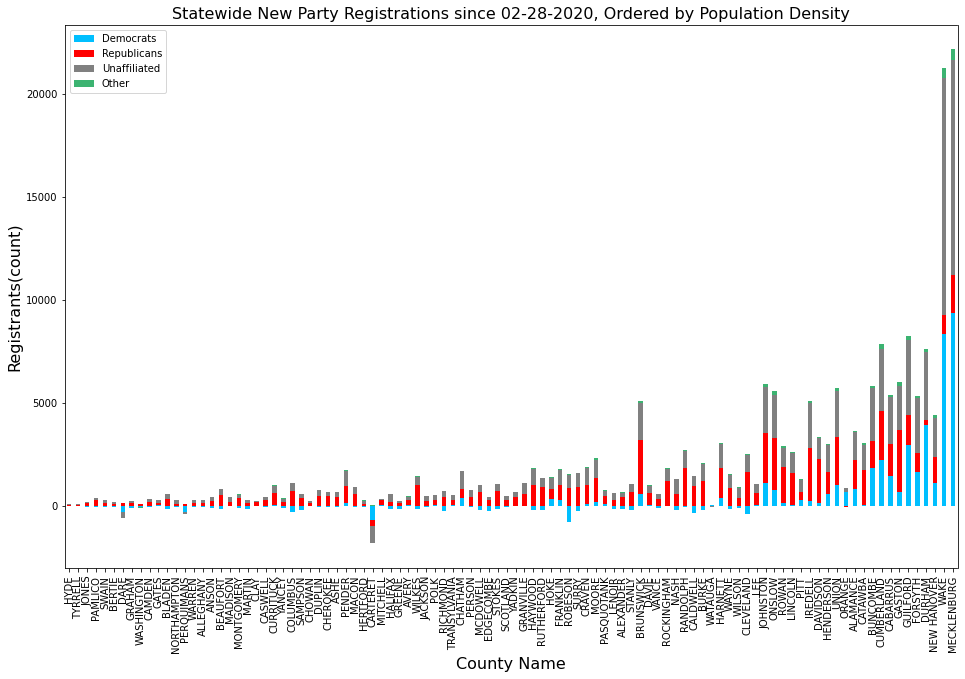

In [41]:
def plot_density_current_registrations(changes, last_date):
    recent = changes.T[last_date].T.set_index('CountyName')
    cols = ['registered.libertarians(count)','registered.green(count)','registered.constitution(count)']
    recent['registered.other(count)'] = recent[cols].sum(axis=1)
    recent = recent.drop(columns=cols).sort_values('cvap.density(count/squaremiles)')
    to_plot = {'registered.democrats(count)': 'Democrats',
               'registered.republicans(count)': 'Republicans',
               'registered.unaffiliated(count)': 'Unaffiliated',
               'registered.other(count)': 'Other'}
    ax = recent[to_plot].rename(columns=to_plot)[to_plot.values()].plot.bar(stacked=True, color=['DeepSkyBlue', 'Red', 'Gray', 'mediumseagreen'])
    #bx = recent['cvap.density(count/squaremiles)'].sort_values().plot(style='.', ax=ax, secondary_y=True, rot=90, color='gray')
    #bx.set_ylim(bottom=-225)
    fontsize=16
    ax.set_title('Statewide New Party Registrations since 02-28-2020, Ordered by Population Density', fontsize=fontsize)
    ax.set_ylabel('Registrants(count)', fontsize=fontsize)
    ax.set_xlabel('County Name', fontsize=fontsize)
    return ax

ax = plot_density_current_registrations(changes, last_date)
ax.get_figure().savefig('assets/images/statewide-registrations-by-county-density.png', bbox_inches='tight')

## Demographic Breakdowns

In [58]:
recent = changes.T[last_date].T
recent.head().T

date                                              2020-09-19   2020-09-19  \
registered.democrats(count)                              820         -154   
registered.republicans(count)                           1394          433   
registered.libertarians(count)                            39           12   
registered.green(count)                                    6            2   
registered.constitution(count)                            10            6   
registered.unaffiliated(count)                          1373          197   
registered.white(count)                                  396          -25   
registered.black(count)                                  283           -3   
registered.american_indian(count)                          6            1   
registered.other(count)                                 2957          523   
registered.hispanic(count)                               216           10   
registered.male(count)                                   427           26   
registered.female(count)                                 593          -17   
registered.undisclosed_gender(count)                    2622          487   
registered.total(count)                                 3642          496   
NativeHawaiian                                           NaN          NaN   
cvap.all_races(count)                                 115973        28629   
cvap.black_aa(count)                                   23370         1760   
cvap.white(count)                                      84558        25940   
pct_cvap.black_aa(%)                                 20.1512      6.14761   
pct_cvap.white(%)                                    72.9118      90.6074   
pct_cvap.all_races.within_state(%)                   1.56442      0.38619   
land.area(square_miles)                                    0            0   
cvap.density(count/squaremiles)                      266.866      108.648   
registered_within_county_cvap.democrats(%)          0.707061    -0.537916   
registered_within_county_cvap.republicans(%)           1.202      1.51245   
registered_within_county_cvap.libertarians(%)      0.0336285    0.0419155   
registered_within_county_cvap.green(%)            0.00517362   0.00698592   
registered_within_county_cvap.constitution(%)      0.0086227    0.0209578   
registered_within_county_cvap.unaffiliated(%)         1.1839     0.688113   
registered_within_county_cvap.total(%)               3.14039      1.73251   
pct_registered.within_race_cvap.black_aa(%)          1.21095    -0.170455   
pct_registered.among_all_races_cvap.black_aa(%)     0.244022   -0.0104789   
pct_registered.among_registered.black_aa(%)        -0.437104    -0.092385   
pct_registered.within_race_cvap.white(%)            0.468318   -0.0963763   
pct_registered.among_all_races_cvap.white(%)        0.341459    -0.087324   
pct_registered.among_registered.white(%)            -1.96887     -1.96636   
most_registered(%)                                  0.707061      1.51245   
CountyName                                          ALAMANCE    ALEXANDER   
most_new_registrants(party)                      republicans  republicans   
most_new_registered(%)                                 1.202      1.51245   

date                                              2020-09-19   2020-09-19  \
registered.democrats(count)                              -63         -109   
registered.republicans(count)                            151          233   
registered.libertarians(count)                            -1            3   
registered.green(count)                                    3            1   
registered.constitution(count)                             2           -1   
registered.unaffiliated(count)                           106          173   
registered.white(count)                                   39           56   
registered.black(count)                                    4          -19   
registered.american_indian(count)                          1            

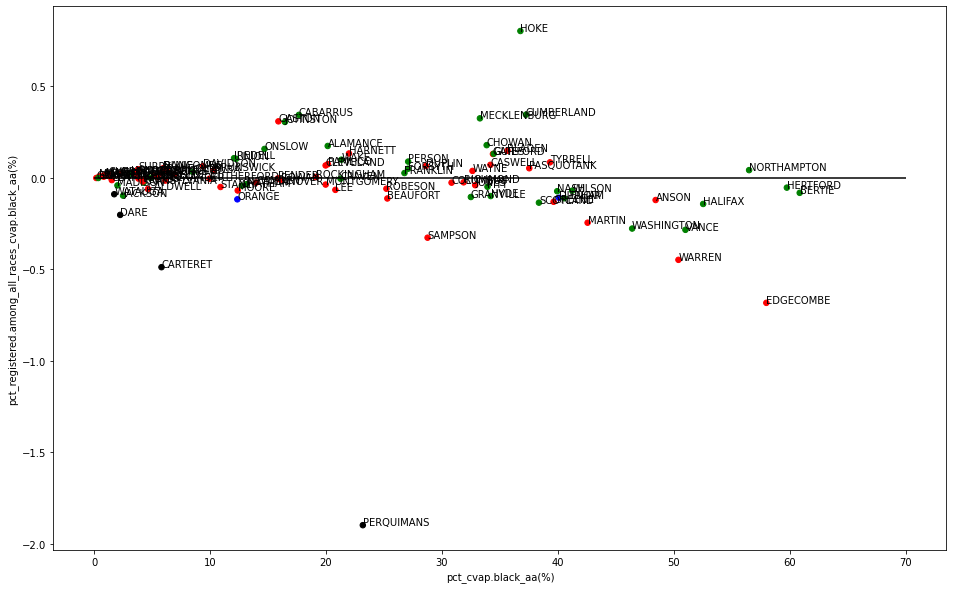

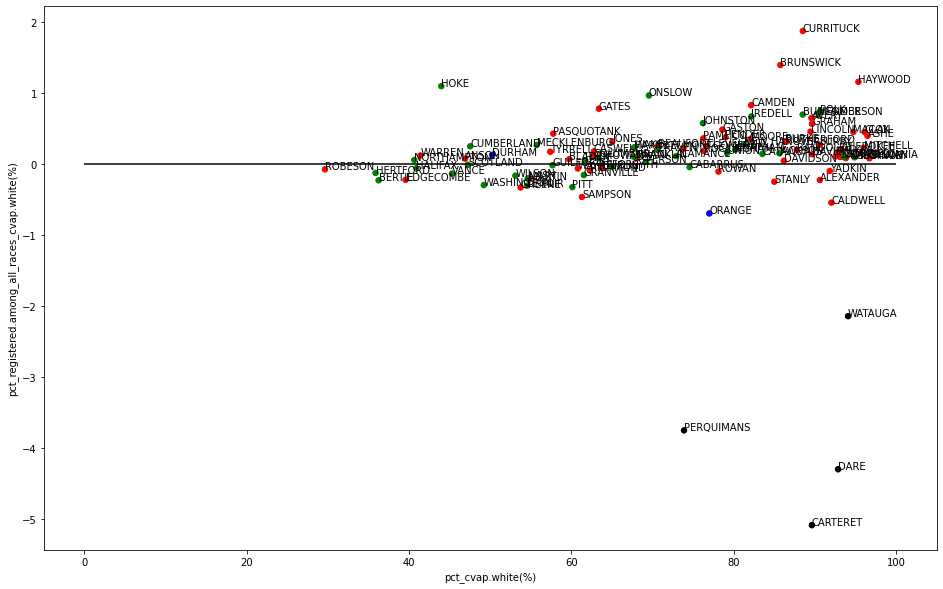

In [852]:
ax = recent.plot.scatter(y='pct_registered.among_all_races_cvap.black_aa(%)', 
                    x='pct_cvap.black_aa(%)', 
                    c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.black_aa(%)','pct_registered.among_all_races_cvap.black_aa(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 70)
ax.get_figure().savefig('images/august2020_pct_registered_black_aa_vs_cvap_black_aa.png')

ax = recent.plot.scatter(y='pct_registered.among_all_races_cvap.white(%)', 
                    x='pct_cvap.white(%)', 
                    c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.white(%)','pct_registered.among_all_races_cvap.white(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)

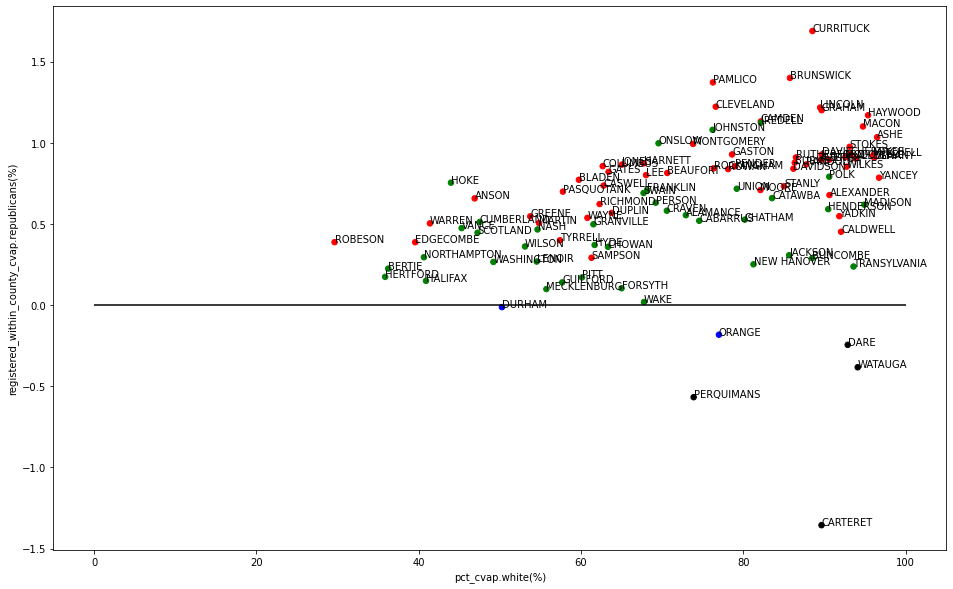

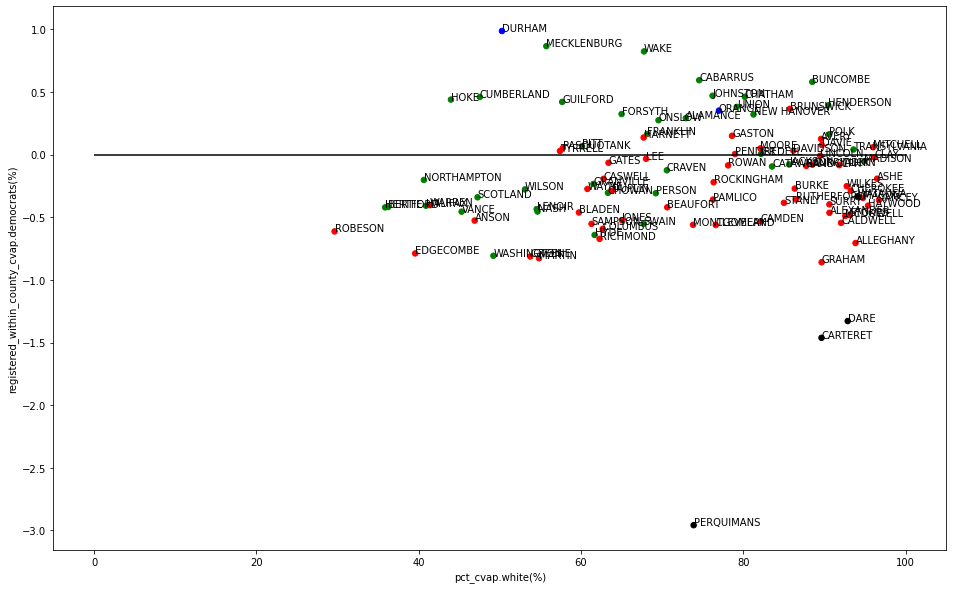

In [849]:
ax = recent.plot.scatter(y='registered_within_county_cvap.republicans(%)', 
                         x='pct_cvap.white(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.white(%)','registered_within_county_cvap.republicans(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)
ax.get_figure().savefig('images/august2020_pct_republicans_vs_cvap_white.png')

ax = recent.plot.scatter(y='registered_within_county_cvap.democrats(%)', 
                         x='pct_cvap.white(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.white(%)','registered_within_county_cvap.democrats(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)
ax.get_figure().savefig('images/august2020_pct_democrats_vs_cvap_white.png')

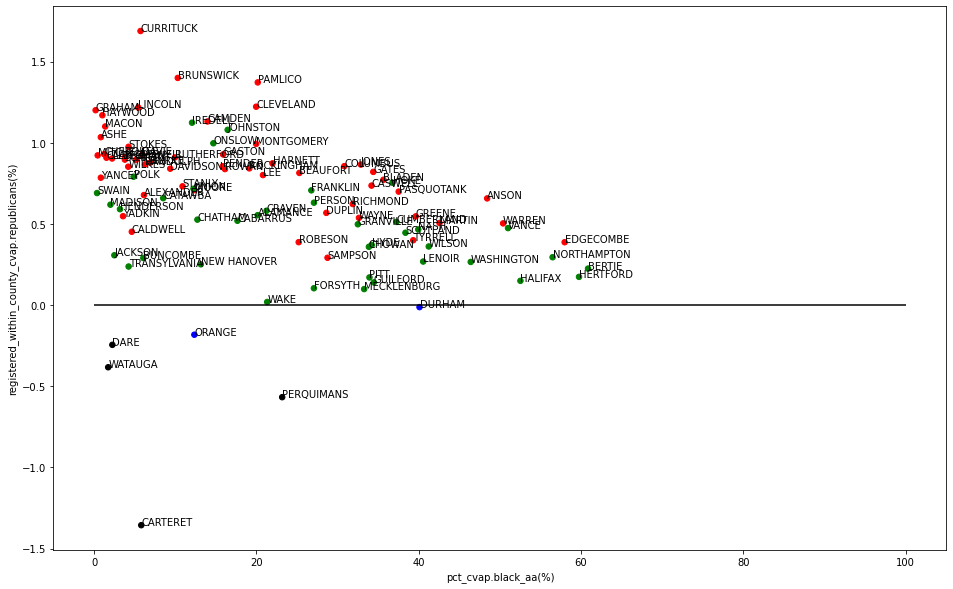

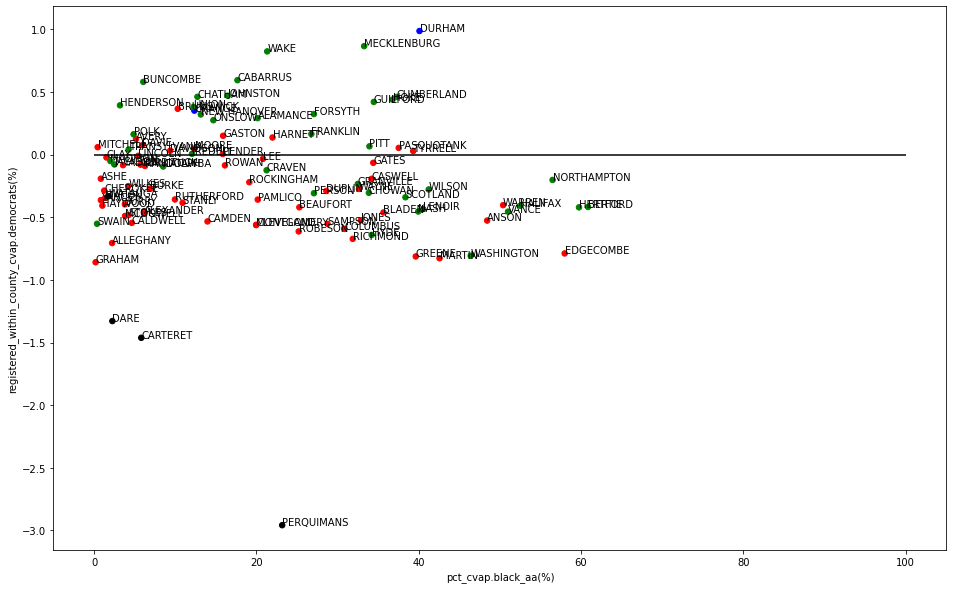

In [850]:
ax = recent.plot.scatter(y='registered_within_county_cvap.republicans(%)', 
                         x='pct_cvap.black_aa(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.black_aa(%)','registered_within_county_cvap.republicans(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)
ax.get_figure().savefig('images/august2020_pct_republicans_vs_cvap_black_aa.png')

ax = recent.plot.scatter(y='registered_within_county_cvap.democrats(%)', 
                         x='pct_cvap.black_aa(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.black_aa(%)','registered_within_county_cvap.democrats(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)
ax.get_figure().savefig('images/august2020_pct_democrats_vs_cvap_black_aa.png')

## party changes

In [1136]:
party_changes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136701 entries, 0 to 136700
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   party_from        136701 non-null  object        
 1   party_to          136701 non-null  object        
 2   date              136701 non-null  datetime64[ns]
 3   event             136701 non-null  object        
 4   county_name       136701 non-null  object        
 5   net_democrats     136701 non-null  int64         
 6   net_republicans   136701 non-null  int64         
 7   net_unaffiliated  136701 non-null  int64         
 8   net_other         136701 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 9.4+ MB


In [1137]:
party_changes

party_from      party_to       date                        event  \
0          democrats  unaffiliated 2020-08-07    democrats-to-unaffiliated   
1          democrats  unaffiliated 2020-08-07    democrats-to-unaffiliated   
2          democrats   republicans 2020-08-07     democrats-to-republicans   
3        republicans  unaffiliated 2020-08-07  republicans-to-unaffiliated   
4       unaffiliated     democrats 2020-08-07    unaffiliated-to-democrats   
...              ...           ...        ...                          ...   
136696   republicans  unaffiliated 2020-08-27  republicans-to-unaffiliated   
136697  unaffiliated   republicans 2020-08-28  unaffiliated-to-republicans   
136698   republicans  unaffiliated 2020-08-28  republicans-to-unaffiliated   
136699  unaffiliated     democrats 2020-08-28    unaffiliated-to-democrats   
136700     democrats   republicans 2020-08-28     democrats-to-republicans   

       county_name  net_democrats  net_republicans  net_unaffiliated  \
0         ALAMANCE             -1                0                 1   
1         ALAMANCE             -1                0                 1   
2         ALAMANCE             -1                1                 0   
3         ALAMANCE              0               -1                 1   
4         ALAMANCE              1                0                -1   
...            ...            ...              ...               ...   
136696      YANCEY              0               -1                 1   
136697      YANCEY              0                1                -1   
136698      YANCEY              0               -1                 1   
136699      YANCEY              1                0                -1   
136700      YANCEY             -1                1                 0   

        net_other  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
136696          0  
136697          0  
136698          0  
136699          0  
136700          0  

[136701 rows x 9 columns]

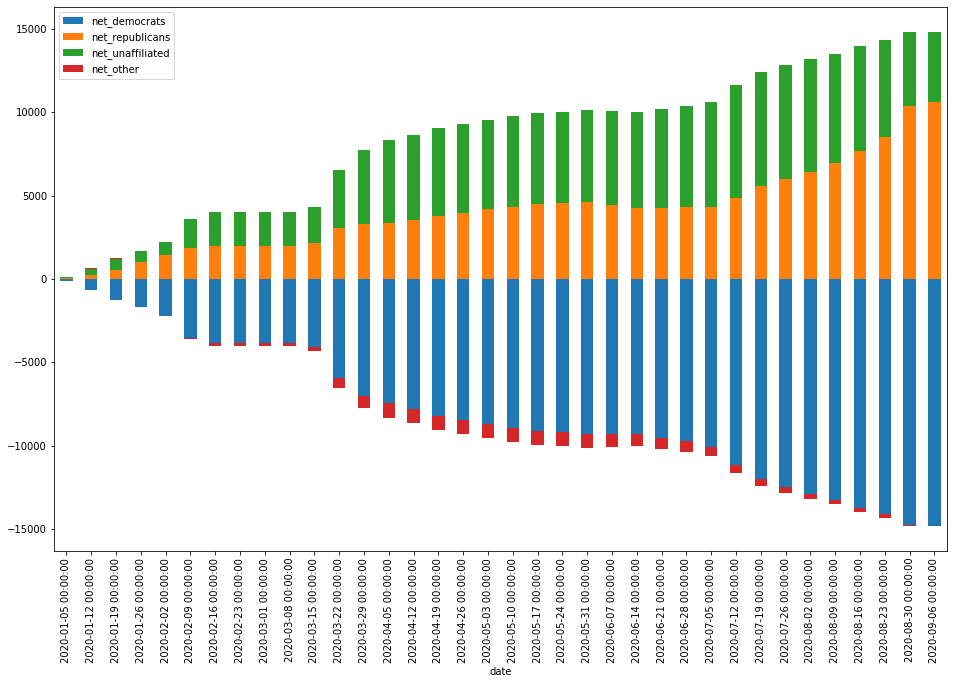

In [1142]:
cols_ = ['net_democrats','net_republicans','net_unaffiliated','net_other']
weekly = party_changes.groupby(pd.Grouper(key='date', freq='W'))[cols_].sum()
weekly.cumsum().plot.bar(stacked=True)

In [44]:
def plot_changes(df, county_name):
    plt.figure()
    cols = ['net_democrats', 'net_republicans', 'net_unaffiliated', 'net_other']
    gg = df.groupby(pd.Grouper(key='date', freq='W-SUN'))[cols].sum()
    gg = pd.DataFrame(gg, index=pd.period_range('2020-02-28', '2020-07-31', freq='W-SAT').to_timestamp())
    ax = gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'])
    ax.set_title('Weekly Party Affiliation Changes, since 02-28-2020')
    ax.set_ylabel('Net Change (count)')
    ax.set_xlabel('Date')
    ax.get_figure().savefig(f'assets/images/county-registration-changes/{county_name}.png', bbox_inches='tight')
    plt.close(ax.get_figure())
    
def plot_cumulative_changes(df, county_name):
    plt.figure()
    cols = ['net_democrats', 'net_republicans', 'net_unaffiliated', 'net_other']
    gg = df.groupby(pd.Grouper(key='date', freq='W-SUN'))[cols].sum().cumsum()
    gg = pd.DataFrame(gg, index=pd.period_range('2020-02-28', '2020-07-31', freq='W-SAT').to_timestamp())
    ax = gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'])
    ax.set_title('Cumulative Party Affiliation Changes, since 02-28-2020')
    ax.set_ylabel('Net Change (count)')
    ax.set_xlabel('Date')
    ax.get_figure().savefig(f'assets/images/cumulative-county-registration-changes/{county_name}.png', bbox_inches='tight')
    plt.close(ax.get_figure())
    
def plot_gain_plus_changes(change, switches, name='Statewide'):
    aa = change.reset_index().groupby('date')[PARTIES].sum()
    aa['registered.other(count)'] = aa[['registered.libertarians(count)','registered.green(count)','registered.constitution(count)']].sum(axis=1)
    cols = ['net_democrats', 'net_republicans', 'net_unaffiliated', 'net_other']
    bb = switches[switches.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W-SAT'))[cols].sum().cumsum()    
    joined = aa.join(bb, how='outer').fillna(method='ffill')    
    fig, ax = plt.subplots(figsize=(16,10))    
    parties = {'democrats': 'Blue', 'republicans': 'Red', 
              'unaffiliated': 'Gray', 'other': 'mediumseagreen', 'total': 'Purple'}
    offset = -1
    for p in parties:
        ax.plot(joined.index, joined[f'registered.{p}(count)'].values, label=p.title(), color=parties[p])
        if p != 'total' and p != 'other':
            ax.bar(joined.index + pd.Timedelta(f'{offset} days'), joined[f'net_{p}'].values, 
                   color=parties[p], width=1.0, align='center', alpha=0.6)
            offset += 1
    plt.legend()    
    font_size = 16
    ax.set_title(f'Cumulative New Voter Registrations and Party Changes since 02-28-2020, {name}', size=font_size)
    ax.set_xlabel('Date', size = font_size)
    ax.set_ylabel('Registrants (count)', size = font_size)
    return ax, joined

In [1178]:
party_changes[party_changes.date >= '2020-02-28']

party_from      party_to       date                        event  \
0          democrats  unaffiliated 2020-08-07    democrats-to-unaffiliated   
1          democrats  unaffiliated 2020-08-07    democrats-to-unaffiliated   
2          democrats   republicans 2020-08-07     democrats-to-republicans   
3        republicans  unaffiliated 2020-08-07  republicans-to-unaffiliated   
4       unaffiliated     democrats 2020-08-07    unaffiliated-to-democrats   
...              ...           ...        ...                          ...   
136696   republicans  unaffiliated 2020-08-27  republicans-to-unaffiliated   
136697  unaffiliated   republicans 2020-08-28  unaffiliated-to-republicans   
136698   republicans  unaffiliated 2020-08-28  republicans-to-unaffiliated   
136699  unaffiliated     democrats 2020-08-28    unaffiliated-to-democrats   
136700     democrats   republicans 2020-08-28     democrats-to-republicans   

       county_name  net_democrats  net_republicans  net_unaffiliated  \
0         ALAMANCE             -1                0                 1   
1         ALAMANCE             -1                0                 1   
2         ALAMANCE             -1                1                 0   
3         ALAMANCE              0               -1                 1   
4         ALAMANCE              1                0                -1   
...            ...            ...              ...               ...   
136696      YANCEY              0               -1                 1   
136697      YANCEY              0                1                -1   
136698      YANCEY              0               -1                 1   
136699      YANCEY              1                0                -1   
136700      YANCEY             -1                1                 0   

        net_other  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
136696          0  
136697          0  
136698          0  
136699          0  
136700          0  

[103927 rows x 9 columns]

<Figure size 1152x720 with 0 Axes>

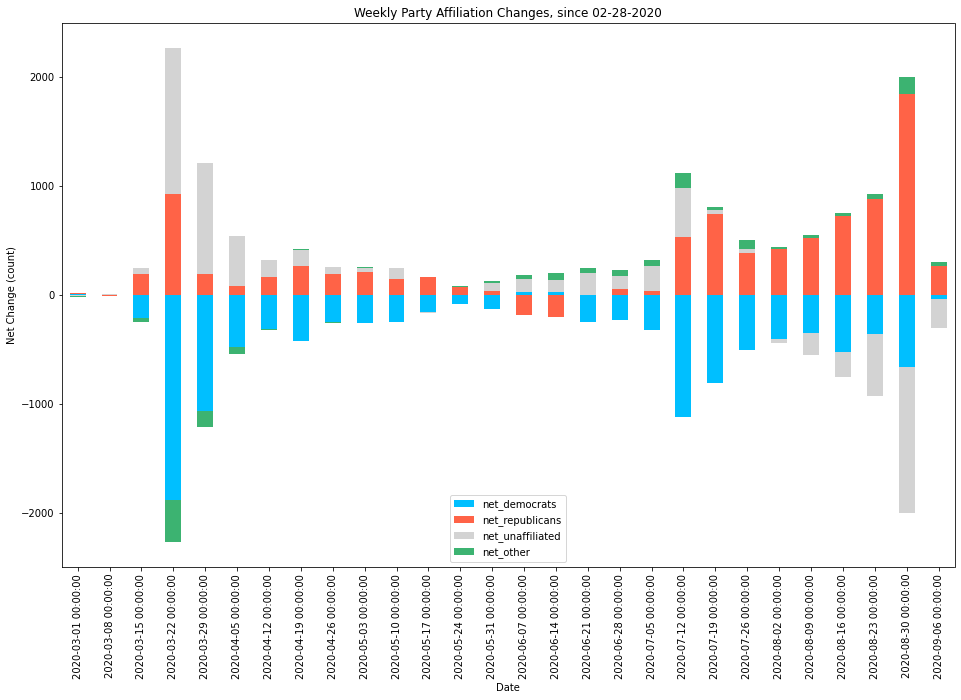

In [1179]:
plt.figure()
cols_ = ['net_democrats','net_republicans','net_unaffiliated','net_other']
gg = party_changes[party_changes.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W'))[cols_].sum()
ax = gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'])
ax.set_title('Weekly Party Affiliation Changes, since 02-28-2020')
ax.set_ylabel('Net Change (count)')
ax.set_xlabel('Date')
ax.get_figure().savefig('assets/images/weekly-party-affiliation-changes.png', bbox_inches='tight')
ax

<Figure size 1152x720 with 0 Axes>

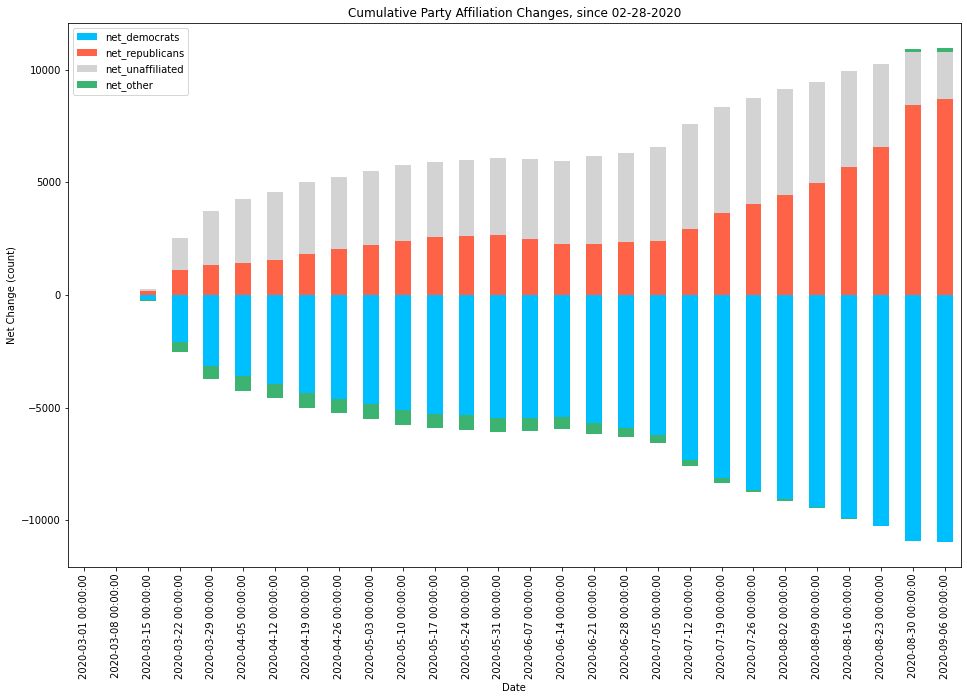

In [1180]:
plt.figure()
cols_ = ['net_democrats','net_republicans','net_unaffiliated','net_other']
gg = party_changes[party_changes.date >= '2020-02-28'].groupby(pd.Grouper(key='date', freq='W'))[cols_].sum().cumsum()
ax = gg.plot.bar(stacked=True, color=['DeepSkyBlue', 'Tomato', 'LightGray', 'mediumseagreen'])
ax.set_title('Cumulative Party Affiliation Changes, since 02-28-2020')
ax.set_ylabel('Net Change (count)')
ax.set_xlabel('Date')
ax.get_figure().savefig('assets/images/cumulative-party-affiliation-changes.png', bbox_inches='tight')
ax

In [320]:
cols

['net_democrats', 'net_republicans', 'net_unaffiliated', 'net_other']

<Figure size 1152x720 with 0 Axes>

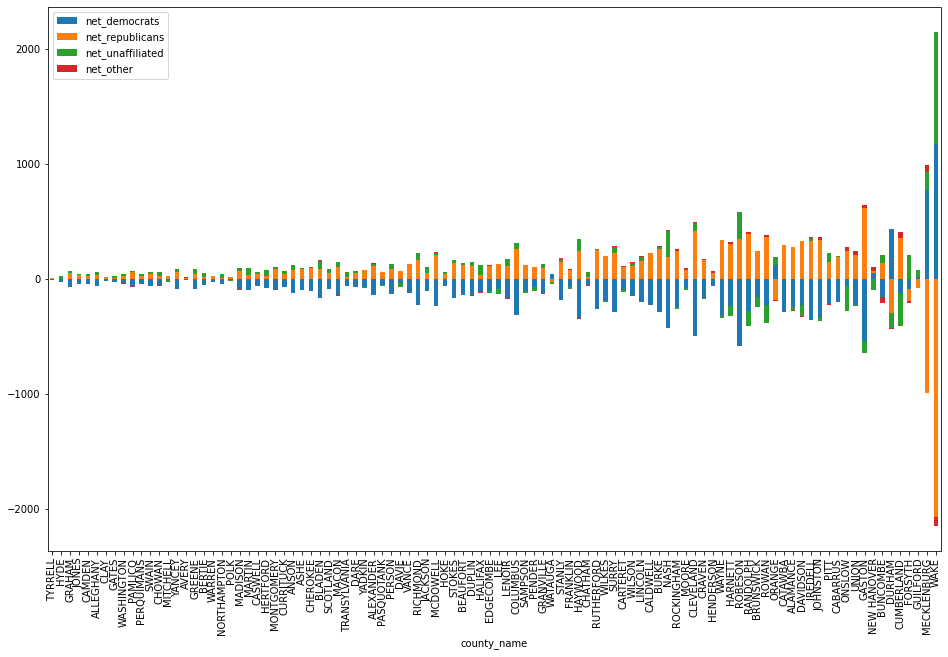

In [1181]:
plt.figure()
gg = party_changes[party_changes.date >= '2020-02-28'].groupby('county_name')[cols_].sum()
gg.join(recent['cvap.all_races(count)']).sort_values('cvap.all_races(count)')[cols_].plot.bar(stacked=True)

In [1167]:
for county_name, df in party_changes.groupby('county_name'):
    print(county_name)
    plot_changes(df[df.date >= '02-28-2020'], county_name.lower())
    plot_cumulative_changes(df[df.date >= '02-28-2020'], county_name.lower())

ALAMANCE
ALEXANDER
ALLEGHANY
ANSON
ASHE
AVERY
BEAUFORT
BERTIE
BLADEN
BRUNSWICK
BUNCOMBE
BURKE
CABARRUS
CALDWELL
CAMDEN
CARTERET
CASWELL
CATAWBA
CHATHAM
CHEROKEE
CHOWAN
CLAY
CLEVELAND
COLUMBUS
CRAVEN
CUMBERLAND
CURRITUCK
DARE
DAVIDSON
DAVIE
DUPLIN
DURHAM
EDGECOMBE
FORSYTH
FRANKLIN
GASTON
GATES
GRAHAM
GRANVILLE
GREENE
GUILFORD
HALIFAX
HARNETT
HAYWOOD
HENDERSON
HERTFORD
HOKE
HYDE
IREDELL
JACKSON
JOHNSTON
JONES
LEE
LENOIR
LINCOLN
MACON
MADISON
MARTIN
MCDOWELL
MECKLENBURG
MITCHELL
MONTGOMERY
MOORE
NASH
NEW HANOVER
NORTHAMPTON
ONSLOW
ORANGE
PAMLICO
PASQUOTANK
PENDER
PERQUIMANS
PERSON
PITT
POLK
RANDOLPH
RICHMOND
ROBESON
ROCKINGHAM
ROWAN
RUTHERFORD
SAMPSON
SCOTLAND
STANLY
STOKES
SURRY
SWAIN
TRANSYLVANIA
TYRRELL
UNION
VANCE
WAKE
WARREN
WASHINGTON
WATAUGA
WAYNE
WILKES
WILSON
YADKIN
YANCEY


<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [1171]:
party_changes[party_changes.party_to == 'unaffiliated'].party_from.value_counts()

democrats       28202
republicans     23363
libertarians     1786
green             166
constitution      131
Name: party_from, dtype: int64

In [584]:
# Switches to republicans
# Switches to unaffiliated
# Switches to democrats
party_changes.event.value_counts()

democrats-to-unaffiliated       23503
unaffiliated-to-democrats       20187
republicans-to-unaffiliated     19668
democrats-to-republicans        16915
unaffiliated-to-republicans     16408
republicans-to-democrats         7033
libertarians-to-unaffiliated     1474
unaffiliated-to-libertarians     1080
libertarians-to-democrats         877
republicans-to-libertarians       723
libertarians-to-republicans       640
democrats-to-libertarians         514
unaffiliated-to-constitution      239
republicans-to-constitution       228
unaffiliated-to-green             213
democrats-to-green                181
green-to-unaffiliated             141
green-to-democrats                132
constitution-to-republicans       131
constitution-to-democrats         105
democrats-to-constitution         104
constitution-to-unaffiliated      102
republicans-to-green               44
libertarians-to-constitution       20
green-to-republicans               19
libertarians-to-green              16
constitution

In [606]:
d2r = party_changes[party_changes.event == 'democrats-to-republicans'].groupby('county_name').count().party_to.sort_values()
d2r

county_name
TYRRELL          3
MITCHELL        10
AVERY           11
HYDE            11
GATES           15
              ... 
FORSYTH        513
GUILFORD       526
CUMBERLAND     556
MECKLENBURG    704
WAKE           910
Name: party_to, Length: 100, dtype: int64

CountyName
ALAMANCE     Text(1.5644161393064597, 0.8228787265614461, '...
ALEXANDER    Text(0.3861904896157264, 2.1675454012888107, '...
ALLEGHANY    Text(0.11652217853577297, 2.252463632097607, '...
ANSON        Text(0.2689128998738868, 0.7090073896544837, '...
ASHE         Text(0.2869888108761947, 2.1106420795378806, '...
                                   ...                        
WAYNE        Text(1.1850378400311554, 1.2063426970131912, '...
WILKES       Text(0.7057698982393658, 2.4286062972907003, '...
WILSON       Text(0.7997916144230122, 0.5016293801032551, '...
YADKIN       Text(0.3819143226099565, 1.8369690011481057, '...
YANCEY       Text(0.18912259123310224, 1.1727559765448805, ...
Length: 100, dtype: object

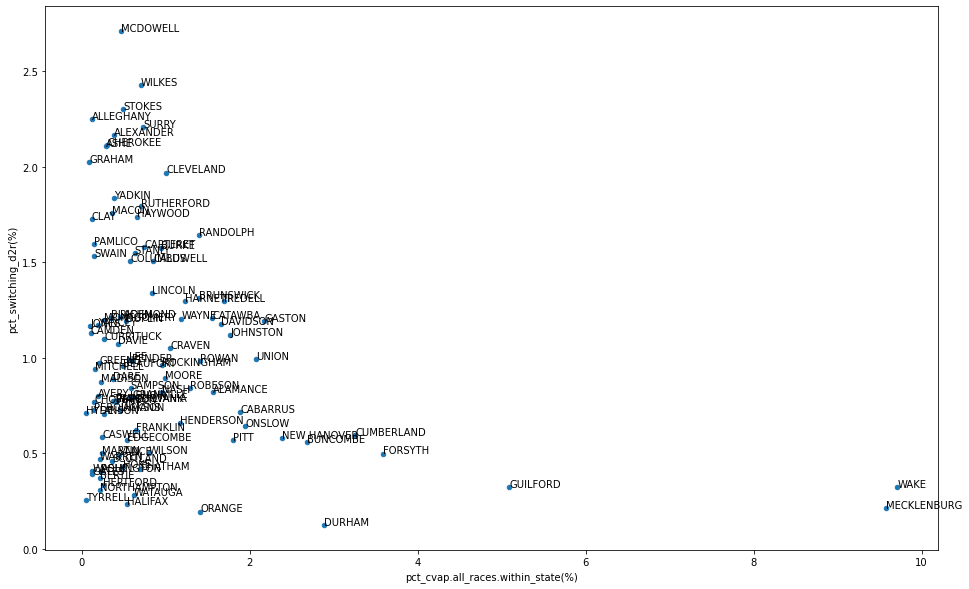

In [638]:
d2r = party_changes[party_changes.event == 'democrats-to-republicans'].groupby('county_name').count().party_to.sort_values()
foo = joined[joined.date == last_date][['registered.democrats(count)', 'CountyName', 'pct_cvap.all_races.within_state(%)']].set_index('CountyName', drop=False).join(d2r)
foo['pct_switching_d2r(%)'] = 100*foo['party_to'] / foo['registered.democrats(count)']
ax = foo.plot.scatter(x='pct_cvap.all_races.within_state(%)',y='pct_switching_d2r(%)')
foo[['pct_cvap.all_races.within_state(%)','pct_switching_d2r(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)

### Graphs: Net State and County Registration 

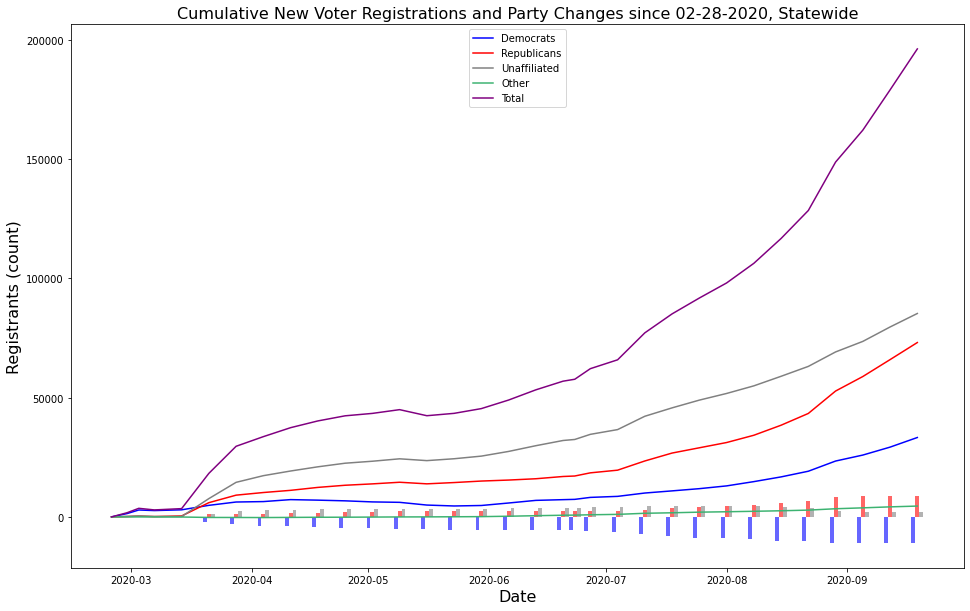

In [45]:
ax, idx = plot_gain_plus_changes(changes, party_changes)
ax.get_figure().savefig('assets/images/statewide-registrations-changes-by-party.png', bbox_inches='tight')

In [47]:
for county_name, df in party_changes.groupby('county_name'):
    print(county_name)
    ax, _ = plot_gain_plus_changes(changes[changes.CountyName == county_name], 
                                   party_changes[party_changes.county_name == county_name], 
                                   f'{county_name.title()} County')
    name = county_name.lower().replace(' ', '_')
    ax.get_figure().savefig(f'assets/images/county-registration-and-changes-by-party/{name}.png', bbox_inches='tight')
    plt.close(ax.get_figure())

ALAMANCE
ALEXANDER
ALLEGHANY
ANSON
ASHE
AVERY
BEAUFORT
BERTIE
BLADEN
BRUNSWICK
BUNCOMBE
BURKE
CABARRUS
CALDWELL
CAMDEN
CARTERET
CASWELL
CATAWBA
CHATHAM
CHEROKEE
CHOWAN
CLAY
CLEVELAND
COLUMBUS
CRAVEN
CUMBERLAND
CURRITUCK
DARE
DAVIDSON
DAVIE
DUPLIN
DURHAM
EDGECOMBE
FORSYTH
FRANKLIN
GASTON
GATES
GRAHAM
GRANVILLE
GREENE
GUILFORD
HALIFAX
HARNETT
HAYWOOD
HENDERSON
HERTFORD
HOKE
HYDE
IREDELL
JACKSON
JOHNSTON
JONES
LEE
LENOIR
LINCOLN
MACON
MADISON
MARTIN
MCDOWELL
MECKLENBURG
MITCHELL
MONTGOMERY
MOORE
NASH
NEW HANOVER
NORTHAMPTON
ONSLOW
ORANGE
PAMLICO
PASQUOTANK
PENDER
PERQUIMANS
PERSON
PITT
POLK
RANDOLPH
RICHMOND
ROBESON
ROCKINGHAM
ROWAN
RUTHERFORD
SAMPSON
SCOTLAND
STANLY
STOKES
SURRY
SWAIN
TRANSYLVANIA
TYRRELL
UNION
VANCE
WAKE
WARREN
WASHINGTON
WATAUGA
WAYNE
WILKES
WILSON
YADKIN
YANCEY


## Shapefiles

In [687]:
nc_shape.T['HYDE']

FID                                                          58
OBJECTID                                                     58
PERIMETER                                                309015
CO_ABBR                                                    HYDE
ACRES                                                    882041
Shape_Leng                                          1.01383e+06
RO                                                         WARO
SHAPE_Le_1                                               379792
SHAPE_Area                                          3.84217e+10
geometry      POLYGON ((-8531314.057 4260116.124799997, -852...
Name: HYDE, dtype: object

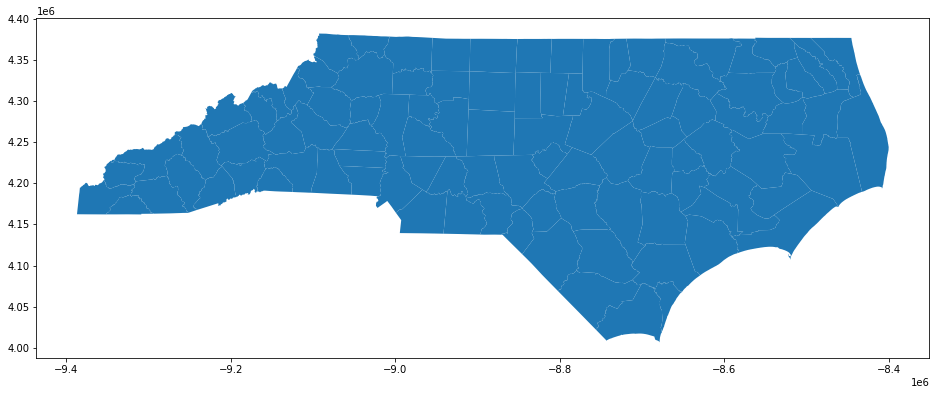

In [675]:
nc_shape.plot()

In [677]:
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

from bokeh.io import output_notebook, push_notebook, show, output_file

output_notebook()


import json

Loading BokehJS ...

In [675]:
to_plot1 = to_plot.rename(columns = {'most_new_registrants(party)': 'party_with_most_new_registrants', 
                         'cvap.all_races(count)': 'population', 
                         'registered_within_county_cvap.democrats(%)': 'change_in_dem_pct'})
to_plot1['most_new_registrants(party)'] = to_plot1['party_with_most_new_registrants']

In [682]:
# TODO(mookerji): 
# - add library functions to make chloropleth, bivariate chloropleth, 
# - strip extra data out of geojson source

def create_geo_datasource(gdf):    
    json_data = json.dumps(json.loads(gdf.to_json()))
    return GeoJSONDataSource(geojson = json_data)

column = 'most_new_registered(%)'

geosource = create_geo_datasource(to_plot)
rep_geosource = create_geo_datasource(to_plot1[to_plot1['most_new_registrants(party)'] == 'republicans'])
rep_color_mapper = LinearColorMapper(palette = brewer['Reds'][8][::-1], 
                                     low = to_plot1[column].min(), 
                                     high = to_plot1[column].max())
dem_geosource = create_geo_datasource(to_plot1[to_plot1['most_new_registrants(party)'] == 'democrats'])
dem_color_mapper = LinearColorMapper(palette = brewer['Blues'][8][::-1],                                      
                                     low = to_plot1[column].min(), 
                                     high = to_plot1[column].max())
unk_geosource = create_geo_datasource(to_plot1[to_plot1['most_new_registrants(party)'] == 'unaffiliated'])
unk_color_mapper = LinearColorMapper(palette = brewer['Greys'][8][::-1], 
                                     low = to_plot1[column].min(), 
                                     high = to_plot1[column].max())
other_geosource = create_geo_datasource(to_plot1[(to_plot1['most_new_registrants(party)'] == 'green') | (to_plot['most_new_registrants(party)'] == 'constitution')])
other_color_mapper = LinearColorMapper(palette = brewer['Greens'][8][::-1], 
                                     low = to_plot1[column].min(), 
                                     high = to_plot1[column].max())


color_bar = lambda t: ColorBar(color_mapper=t,  label_standoff=8, width=500, height=10,  location=(0,0), orientation='horizontal')

p = figure(plot_height=375 , plot_width=850, toolbar_location='right')    
p.patches('xs','ys', source=rep_geosource, fill_alpha=1, line_width=0.5, line_color='black', 
          fill_color={'field' : column , 'transform': rep_color_mapper})

p.patches('xs','ys', source=dem_geosource, fill_alpha=1, line_width=0.5, line_color='black', 
          fill_color={'field' : column , 'transform': dem_color_mapper})
p.patches('xs','ys', source=unk_geosource, fill_alpha=1, line_width=0.5, line_color='black',           
          fill_color={'field' : column , 'transform': unk_color_mapper})

p.patches('xs','ys', source=other_geosource, fill_alpha=1, line_width=0.5, line_color='black', 
          fill_color={'field' : column , 'transform': other_color_mapper})

p.add_layout(color_bar(rep_color_mapper), 'below')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

p.add_tools(HoverTool(tooltips = [('County','@CountyName'), 
                                  ('Population', '@population'), 
                                  ('Winning Registrations', '@party_with_most_new_registrants'),
                                  ('Dem. Reg. Change (%)', '@change_in_dem_pct')
                                 ]))
show(p)

In [1183]:
recent['most_new_registrants(party)'].value_counts()

republicans     69
unaffiliated    27
democrats        2
constitution     1
green            1
Name: most_new_registrants(party), dtype: int64

In [680]:
p.output_file('images/august2020-pct-change.html')

AttributeError: 'Figure' object has no attribute 'output_file'

In [681]:
output_file('images/august2020-pct-change.html', mode='inline')

## VBM

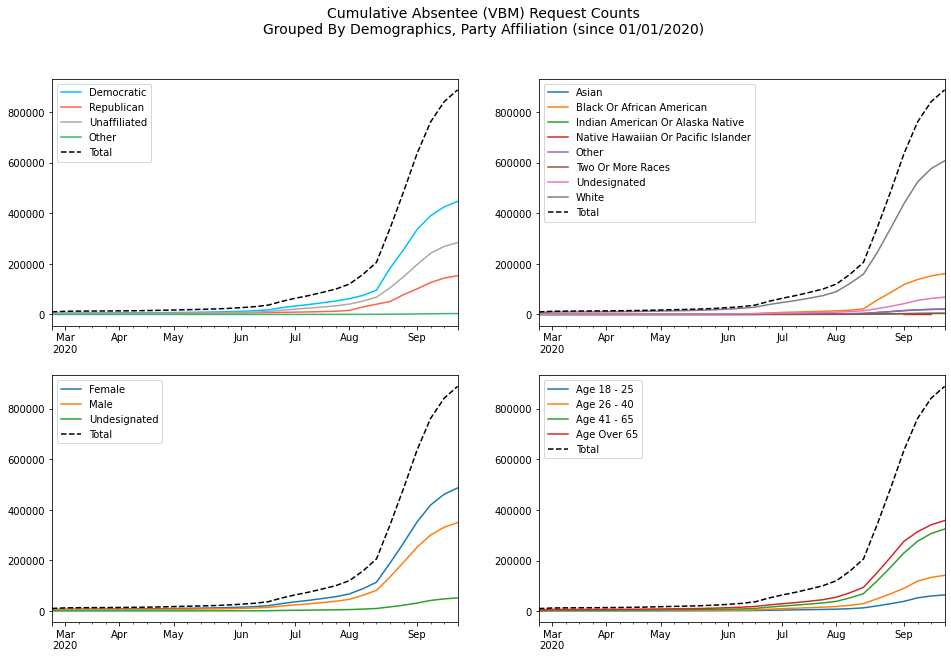

In [51]:
def plot_vm_counts(absentee, start_date='2020-02-25'):
    col_types = ['party_desc', 'race_desc', 'gender_desc', 'age_range']
    figure, axs = plt.subplots(2,2)
    axs = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
    ax_index = 0
    for col_type in col_types: 
        colors = {'Democratic': 'DeepSkyBlue', 'Republican': 'Tomato', 'Unaffiliated': 'DarkGray', 'Other': 'mediumseagreen'}   
        for group in np.sort(absentee[col_type].unique()):
            grouped = absentee[absentee[col_type] == group].groupby(pd.Grouper(key='request_week_date', freq='W-SAT'))
            cumulative = grouped['group_count'].sum().cumsum()
            cumulative = cumulative[cumulative.index >= start_date]
            label = group.title()
            if col_type == 'party_desc':   
                cumulative.plot(label=label, color=colors.get(group.title()), ax=axs[ax_index])
            else:
                cumulative.plot(label=label, ax=axs[ax_index])
        grouped = absentee.groupby(pd.Grouper(key='request_week_date', freq='W-SAT'))
        cumulative = grouped['group_count'].sum().cumsum()
        cumulative = cumulative[cumulative.index >= start_date]
        cumulative.plot(label='Total', color='Black', ax=axs[ax_index], style='--')
        axs[ax_index].legend()
        axs[ax_index].set_xlabel('')
        ax_index += 1    
    figure.suptitle('Cumulative Absentee (VBM) Request Counts\nGrouped By Demographics, Party Affiliation (since 01/01/2020)', fontsize=14)
    return figure

figure = plot_vm_counts(absentee2020_req)
figure.savefig('assets/images/statewide-vbm-requests-by-demographic.png', bbox_inches='tight')

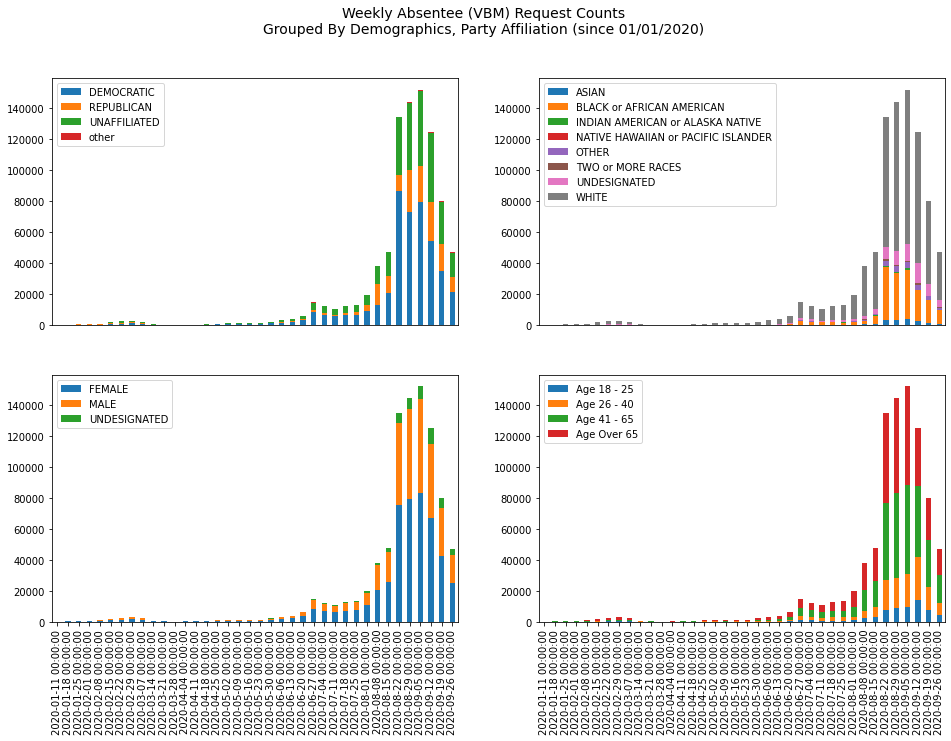

In [52]:
def plot_vm_counts_by_week(absentee, start_date='2020-02-25'):
    col_types = ['party_desc', 'race_desc', 'gender_desc', 'age_range']
    figure, axs = plt.subplots(2,2)
    axs = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
    ax_index = 0
    for col_type in col_types:
        weekly = absentee.groupby(pd.Grouper(key='request_week_date', freq='W-SAT'))
        summed = weekly.apply(lambda v: v.groupby(col_type)['group_count'].sum())
        if isinstance(summed.index, pd.MultiIndex):
            summed.unstack().plot.bar(stacked=True, ax=axs[ax_index])
        else:
            summed.plot.bar(stacked=True, ax=axs[ax_index])
        axs[ax_index].legend()
        axs[ax_index].set_xlabel('')
        if ax_index < 2:
            axs[ax_index].set_xticks([])
        ax_index += 1    
    figure.suptitle('Weekly Absentee (VBM) Request Counts\nGrouped By Demographics, Party Affiliation (since 01/01/2020)', fontsize=14)
    return figure

figure = plot_vm_counts_by_week(absentee2020_req)
figure.savefig('assets/images/statewide-vbm-requests-by-demographic-weekly.png', bbox_inches='tight')

In [53]:
def format_top_absentee(absentee): 
    absentee_ = absentee.copy()
    absentee_['age_range'] = absentee_['age_range'].str.lstrip('Age ')
    top_abm = absentee_.groupby(['party_desc', 'race_desc', 'gender_desc', 'age_range']).group_count.sum().nlargest(n=20)
    top_abm = top_abm.to_frame().join(top_abm.index.to_frame()).rename(columns={'party_desc': 'Party', 
                                  'race_desc': 'Race', 
                                  'gender_desc': 'Gender',
                                  'age_range': 'Age Range',
                                   'group_count': 'Count'
                                 })
    top_abm.reset_index()[['Party', 'Race', 'Gender', 'Age Range', 'Count']].to_html('_includes/tables/abm_top_20_groups.html', index=False)

format_top_absentee(absentee2020_req)    

In [62]:
def normalize_absentee(absentee):
    dfs = []
    for county_name in absentee.county_name.unique():
        county = absentee[absentee.county_name == county_name]
        if county.empty:
            dfs.append([])
        counts = county.groupby(pd.Grouper(key='request_week_date', freq='W-SAT')).apply(lambda t: t.groupby('party_desc').group_count.sum())
        if isinstance(counts.index, pd.MultiIndex):
            counts = counts.reset_index().pivot(index='request_week_date', columns='party_desc', values='group_count')    
        counts['county_name'] = county_name
        counts['date'] = counts.index
        dfs.append(counts)
    return pd.concat(dfs)

def get_cumulative_absentee_by_county(county_absentee):
    counties = []
    for county_name, county in county_absentee.groupby('county_name'):
        tmp = county[['DEMOCRATIC', 'REPUBLICAN', 'UNAFFILIATED', 'other']].cumsum().tail(1)
        tmp['county_name'] = county_name
        counties.append(tmp)
    return pd.concat(counties).set_index('county_name')

county_absentee = normalize_absentee(absentee2020_req)
latest_absentee = get_cumulative_absentee_by_county(county_absentee)
density = recent.set_index('CountyName')['cvap.density(count/squaremiles)']
latest_absentee = latest_absentee.join(density)

In [63]:
def plot_density_absentees(latest_absentee):
    latest_absentee = latest_absentee.sort_values('cvap.density(count/squaremiles)')
    to_plot = {'DEMOCRATIC': 'Democrats',
               'REPUBLICAN': 'Republicans',
               'UNAFFILIATED': 'Unaffiliated',
               'other': 'Other'}
    ax = latest_absentee[to_plot.keys()].rename(columns=to_plot).plot.bar(stacked=True, color=['DeepSkyBlue', 'Red', 'Gray', 'mediumseagreen'])
    fontsize=16
    ax.set_title('Absentee (VBM) Request Counts Grouped By County, Party Affiliation, Ordered by Density (since 01/01/2020)', 
                 fontsize=fontsize)
    ax.set_ylabel('Requests(count)', fontsize=fontsize)
    ax.set_xlabel('County Name', fontsize=fontsize)
    return ax

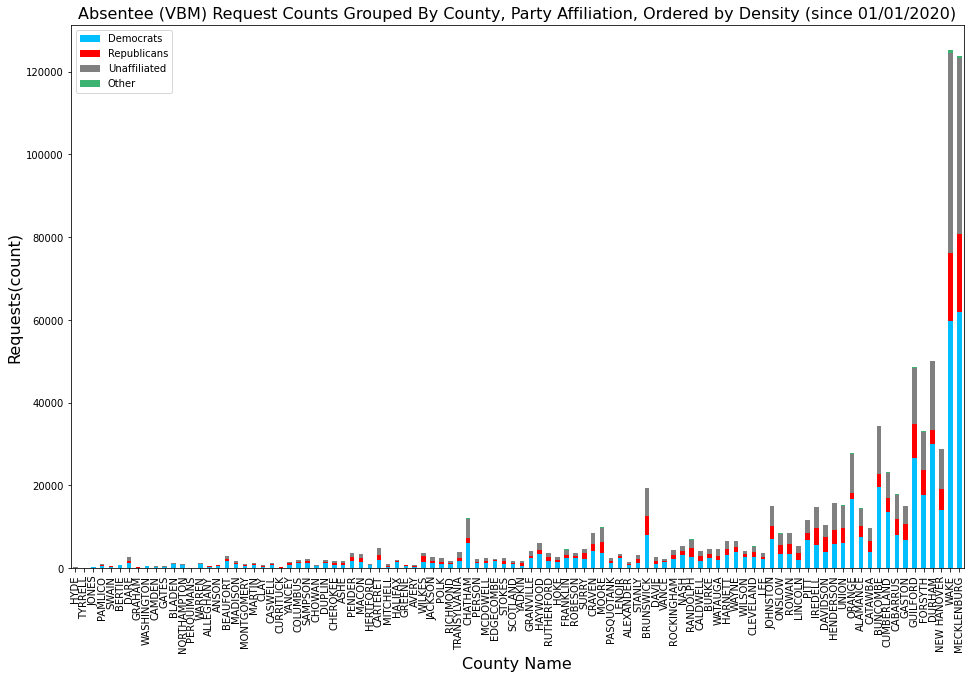

In [64]:
ax = plot_density_absentees(latest_absentee)
ax.get_figure().savefig('assets/images/statewide-vbm-requests-by-county.png', bbox_inches='tight')

## Summarization

In [67]:
last_date

Timestamp('2020-09-19 00:00:00')

In [95]:
absentee_2016 = pd.read_csv('limbo/absentee_20161108_w_ethnicity-stripped.csv', 
                            parse_dates=['ballot_req_dt', 'ballot_rtn_dt', 'ballot_rtn_status'])
absentee_counts = absentee_2016.groupby(pd.Grouper(key='ballot_req_dt', freq='W-SAT')).count().county_desc

col_parties = ['registered.democrats(count)',     
'registered.republicans(count)',  
'registered.libertarians(count)',
'registered.green(count)',
'registered.constitution(count)', 
'registered.unaffiliated(count)',
              'registered.total(count)']

changes2016 = compute_change_no_demographics(registrations_2016)

totals_2016 = changes2016.T[changes2016.index[-1]].T.sum().to_frame().T[col_parties]
totals_2020 = changes.T[last_date].T.sum().to_frame().T[col_parties]
cols = ['registered.libertarians(count)','registered.green(count)','registered.constitution(count)']
totals_2020['registered.other(count)'] = totals_2020[cols].sum(axis=1)
cols_ = {'registered.democrats(count)': "Democrats",     
'registered.republicans(count)': 'Republicans',  
'registered.unaffiliated(count)': 'Unaffiliated',
         'registered.other(count)': 'Other',
              'registered.total(count)': 'Total'}
registration_totals = totals_2020.drop(labels=cols, axis=1).rename(columns=cols_)
registration_totals['Total (2016)'] = totals_2016['registered.total(count)']

cols_party = ['DEMOCRATIC','REPUBLICAN','UNAFFILIATED','other']
latest_absentee_ = latest_absentee[cols_party].copy()
latest_absentee_['Total'] = latest_absentee_[cols_party].sum(axis=1)
absentee_totals = latest_absentee_.sum().to_frame().T.rename(columns={'DEMOCRATIC': 'Democrats',
                                                   'REPUBLICAN': 'Republicans', 
                                                   'UNAFFILIATED': 'Unaffiliated', 'other': 'Other'})
absentee_totals['Total (2016)'] = absentee_counts[(absentee_counts.index > '2016-01-01') & (absentee_counts.index  <= '2016-09-16')].cumsum().iloc[-1]

summary_table = pd.concat([registration_totals, absentee_totals])
summary_table.index = ['Registrations', 'VBM Requests']
summary_table = pd.concat([summary_table, summarize_absentee(absentee_2020)])
#pd.set_option('precision', 0)
summary_table[['Democrats', 'Republicans', 'Unaffiliated', 'Other', 'Total', 'Total (2016)']].replace(np.nan, '', regex=True).to_html('_includes/tables/totals_summary.html')
#pd.set_option('precision', 6)
summary_table

Democrats Republicans Unaffiliated   Total   Other Total (2016)
Registrations     33278       73090        85267  196173  4538.0       204161
VBM Requests     447037      153435       284001  887812  3339.0        40296
VBM Submitted     65694       18934        34135  119086   323.0          NaN
VBM Accepted      64065       18542        33560  116487   320.0          NaN
VBM Returned       1629         392          575    2599     3.0          NaN

In [98]:
# BUG (!)
absentee_req.group_count.sum()

NameError: name 'absentee_req' is not defined

## 2020 Absentee File

In [6]:
1

1

In [68]:
ls limbo/

absentee_20161108_w_ethnicity-stripped.csv
absentee_20161108_w_ethnicity.csv
absentee_20201103 (3).zip
absentee_20201103 4.csv
absentee_20201103-stripped.csv
absentee_20201103.csv
absentee_20201103.zip
absentee_20201103_4_stripped.csv
absentee_20201103_stripped.csv
absentee_county_20201103 (4)/
absentee_county_20201103 (4).zip
absentee_demo_stats_20201103.csv
notes.md
notes.md~
vopro-notes.md
vopro-notes.md~


In [69]:
def read_absentee_voter_file(filename):
    date_cols = ['ballot_req_dt', 'ballot_rtn_dt', 'ballot_rtn_status', 'ballot_send_dt']
    absentee = pd.read_csv(filename, parse_dates=date_cols)
    age_groups = {pd.Interval(18, 25, closed='right'): '18 - 25',
                  pd.Interval(25, 40, closed='right'): '25 - 40',
                  pd.Interval(40, 65, closed='right'): '41 - 65',
                  pd.Interval(65, 120, closed='right'): 'Over 65',
                 }
    parties = {'DEM': 'Democrats',
    'UNA': 'Unaffiliated',
    'REP': 'Republicans',
    'LIB': 'Other',
    'GRE': 'Other',
    'CST': 'Other'}    
    gender = {'M': 'Male', 'F': 'Female', 'U': 'Undesignated'}
    absentee['gender'] = absentee['gender'].map(gender)
    absentee['ballot_request_party'] = absentee['ballot_request_party'] .map(parties)
    absentee['voter_party_code'] = absentee['voter_party_code'] .map(parties)
    absentee['age_group'] = pd.cut(absentee.age, bins=[18,25,40,65,120]).map(age_groups)
    absentee['party'] = absentee['voter_party_code']
    assert absentee[absentee.ballot_req_type != 'MAIL'].empty
    absentee = absentee[absentee.ballot_req_type == 'MAIL']
    return absentee

def summarize_absentee(absentee):
    all_submitted = absentee.groupby('voter_party_code').count().county_desc
    all_submitted['Total'] = all_submitted.sum()
    all_accepted = absentee[absentee.ballot_rtn_status == 'ACCEPTED'].groupby('voter_party_code').count().county_desc
    all_accepted['Total'] = all_accepted.sum()
    all_returned = absentee[absentee.ballot_rtn_status != 'ACCEPTED'].groupby('voter_party_code').count().county_desc
    all_returned['Total'] = all_returned.sum()
    return pd.DataFrame({'VBM Submitted': all_submitted, 'VBM Accepted': all_accepted, 'VBM Returned': all_returned}).T.round()

In [92]:
absentee_2020 = read_absentee_voter_file('limbo/absentee_20201103-stripped.csv')
absentee_2020

county_desc  voter_reg_num      ncid voter_last_name voter_first_name  \
0         ALAMANCE        9144384  AA125250           AARON          RICHARD   
1         ALAMANCE           9000    AA2079       ABPLANALP            LINDA   
2         ALAMANCE           9100    AA2080       ABPLANALP          WILLIAM   
3         ALAMANCE        9180075  BL267759           ADAMS          CAROLYN   
4         ALAMANCE          16960    AA2130           ADAMS         MARGARET   
...            ...            ...       ...             ...              ...   
119081      YANCEY          17890   ES19870        WOODWARD            RANDY   
119082      YANCEY           2941    ES4972           WOODY            LINDA   
119083      YANCEY          15845   ES17825         WORKMAN           STEVEN   
119084      YANCEY           4941    ES6971           YOUNG          KENNETH   
119085      YANCEY          10161   ES12185           YOUNG             MARK   

       voter_middle_name   race                   ethnicity  gender  age  ...  \
0                  BRIAN  WHITE                UNDESIGNATED    Male   48  ...   
1                COLLINS  WHITE  NOT HISPANIC or NOT LATINO  Female   78  ...   
2                 HOWARD  WHITE  NOT HISPANIC or NOT LATINO    Male   78  ...   
3                   JEAN  WHITE  NOT HISPANIC or NOT LATINO  Female   62  ...   
4                 HOHMAN  WHITE  NOT HISPANIC or NOT LATINO  Female   78  ...   
...                  ...    ...                         ...     ...  ...  ...   
119081            GRAHAM  WHITE  NOT HISPANIC or NOT LATINO    Male   66  ...   
119082               NaN  WHITE  NOT HISPANIC or NOT LATINO  Female   76  ...   
119083                 J  WHITE  NOT HISPANIC or NOT LATINO    Male   72  ...   
119084                 E  WHITE  NOT HISPANIC or NOT LATINO    Male   86  ...   
119085           KENNETH  WHITE  NOT HISPANIC or NOT LATINO    Male   54  ...   

       ballot_request_party ballot_req_dt ballot_send_dt ballot_rtn_dt  \
0              Unaffiliated    2020-07-28     2020-09-04    2020-09-17   
1               Republicans    2020-08-19     2020-09-04    2020-09-11   
2               Republicans    2020-08-19     2020-09-04    2020-09-11   
3              Unaffiliated    2020-08-31     2020-09-04    2020-09-15   
4              Unaffiliated    2020-09-08     2020-09-09    2020-09-15   
...                     ...           ...            ...           ...   
119081          Republicans    2020-08-18     2020-09-04    2020-09-16   
119082            Democrats    2020-08-27     2020-09-04    2020-09-17   
119083         Unaffiliated    2020-08-17     2020-09-04    2020-09-15   
119084            Democrats    2020-07-06     2020-09-04    2020-09-15   
119085            Democrats    2020-07-06     2020-09-04    2020-09-15   

        ballot_rtn_status site_name sdr mail_veri_status  age_group  \
0                ACCEPTED       NaN                         41 - 65   
1                ACCEPTED       NaN                         Over 65   
2                ACCEPTED       NaN                         Over 65   
3                ACCEPTED       NaN                         41 - 65   
4                ACCEPTED       NaN                         Over 65   
...                   ...       ...  ..              ...        ...   
119081           ACCEPTED       NaN                         Over 65   
119082           ACCEPTED       NaN                         Over 65   
119083           ACCEPTED       NaN                         Over 65   
119084           ACCEPTED       NaN                         Over 65   
119085           ACCEPTED       NaN                         41 - 65   

               party  
0       Unaffiliated  
1        Republicans  
2        Republicans  
3       Unaffiliated  
4       Unaffiliated  
...              ...  
119081   Republicans  
119082     Democrats  
119083  Unaffiliated  
119084     Democrats  
119085     Democrats  

[119086 rows x 45 columns]

In [78]:
absentee_2020.ballot_req_delivery_type.value_counts()

MAIL         116699
E-MAIL         2382
IN PERSON         5
Name: ballot_req_delivery_type, dtype: int64

In [79]:
absentee_2020.gender.value_counts()

Female          62133
Male            51781
Undesignated     5172
Name: gender, dtype: int64

In [80]:
absentee_2020.head().T

0  \
county_desc                                  ALAMANCE   
voter_reg_num                                 9144384   
ncid                                         AA125250   
voter_last_name                                 AARON   
voter_first_name                              RICHARD   
voter_middle_name                               BRIAN   
race                                            WHITE   
ethnicity                                UNDESIGNATED   
gender                                           Male   
age                                                48   
application_num                                 OVR-6   
voter_street_address                1013  EDITH ST      
voter_city                                 BURLINGTON   
voter_state                                        NC   
voter_zip                                       27215   
ballot_mail_street_address      TRANSVERSAL 53A#65-70   
ballot_mail_city                                  NaN   
ballot_mail_state                                 NaN   
ballot_mail_zip                                   NaN   
other_mail_addr1            MEDELLIN, COLOMBIA 050034   
other_mail_addr2                                  NaN   
other_city_state_zip                              NaN   
relative_request_name                                   
relative_request_address                                
relative_request_city                             NaN   
relative_request_state                            NaN   
relative_request_zip                              NaN   
election_dt                                11/03/2020   
voter_party_code                         Unaffiliated   
precinct_desc                            BURLINGTON 4   
cong_dist_desc              CONGRESSIONAL DISTRICT 13   
nc_house_desc                    NC HOUSE DISTRICT 63   
nc_senate_desc                  NC SENATE DISTRICT 24   
ballot_req_delivery_type                       E-MAIL   
ballot_req_type                                  MAIL   
ballot_request_party                     Unaffiliated   
ballot_req_dt                     2020-07-28 00:00:00   
ballot_send_dt                    2020-09-04 00:00:00   
ballot_rtn_dt                     2020-09-17 00:00:00   
ballot_rtn_status                            ACCEPTED   
site_name                                         NaN   
sdr                                                     
mail_veri_status                                        
age_group                                     41 - 65   
party                                    Unaffiliated   

                                                     1  \
county_desc                                   ALAMANCE   
voter_reg_num                                     9000   
ncid                                            AA2079   
voter_last_name                              ABPLANALP   
voter_first_name                                 LINDA   
voter_middle_name                              COLLINS   
race                                             WHITE   
ethnicity                   NOT HISPANIC or NOT LATINO   
gender                                          Female   
age                                                 78   
application_num                               CIV-4910   
voter_street_address              1030  GLENVIEW LN      
voter_city                                  BURLINGTON   
voter_state                                         NC   
voter_zip                                        27215   
ballot_mail_street_address            1030 GLENVIEW LN   
ballot_mail_city                            BURLINGTON   
ballot_mail_state                                   NC   
ballot_mail_zip                                  27215   
other_mail_addr1                                   NaN   
other_mail_addr2                                   NaN   
other_city_state_zip                               NaN   
relative_request_name                                    
relative_request_address             

In [76]:
summarize_absentee(absentee_2020)

Democrats  Other  Republicans    Total  Unaffiliated
VBM Submitted    11623.0   49.0       2639.0  19979.0        5668.0
VBM Accepted     11168.0   49.0       2553.0  19290.0        5520.0
VBM Returned       455.0    NaN         86.0    689.0         148.0

In [81]:
absentee_2020.ballot_rtn_status.value_counts()

ACCEPTED                   116487
WITNESS INFO INCOMPLETE      1601
SPOILED                       747
PENDING                       130
PENDING CURE                   57
RETURNED UNDELIVERABLE         38
SIGNATURE DIFFERENT             8
CONFLICT                        7
ACCEPTED - CURED                7
DUPLICATE                       4
Name: ballot_rtn_status, dtype: int64

In [82]:
def get_top_abm_submitters(absentee, size=10):
    top = absentee_2020.groupby(['party', 'gender', 'race', 'age_group']).ballot_send_dt.count().nlargest(size)
    return top.reset_index().rename(columns={'party': 'Party', 
                                  'race': 'Race', 
                                  'gender': 'Gender',
                                  'age_group': 'Age Range',
                                   'ballot_send_dt': 'Count'
                                 })

def get_top_abm_not_accepted(absentee, size=10):
    top = absentee[absentee.ballot_rtn_status != 'ACCEPTED'].groupby(['party', 'county_desc', 'race']).ballot_send_dt.count().nlargest(size)
    return top.reset_index().rename(columns={'party': 'Party', 
                                  'race': 'Race', 
                                  'county_desc': 'County',
                                   'ballot_send_dt': 'Count'
                                 })

def get_top_abm_reasons(absentee, size=10):
    top = absentee[absentee.ballot_rtn_status != 'ACCEPTED'].groupby(['party', 'county_desc', 'ballot_rtn_status']).ballot_send_dt.count().nlargest(size)
    return top.reset_index().rename(columns={'party': 'Party', 
                                  'race': 'Race', 
                                  'county_desc': 'County',
                                    'ballot_rtn_status': 'Return Reason',
                                   'ballot_send_dt': 'Count'
                                 })

get_top_abm_submitters(absentee_2020).to_html('_includes/tables/abm_top_20_abm_submissions.html', index=False)
get_top_abm_not_accepted(absentee_2020).to_html('_includes/tables/abm_top_20_abm_returned.html', index=False)
get_top_abm_reasons(absentee_2020).to_html('_includes/tables/abm_top_20_abm_reasons.html', index=False)

In [1806]:
absentee_2020[col_type].unique()

array(['Female', 'Male', 'Undesignated'], dtype=object)

In [83]:
absentee_2020.ballot_rtn_dt.value_counts()

2020-09-16    22918
2020-09-14    21887
2020-09-17    17892
2020-09-15    14507
2020-09-18    14065
2020-09-11     9803
2020-09-10     6869
2020-09-12     5537
2020-09-09     3555
2020-09-08     1586
2020-09-13      186
2020-09-04      108
2020-09-06       68
2020-09-05       59
2020-09-07       38
2020-08-24        1
2020-09-19        1
2020-11-10        1
2020-09-28        1
2020-09-29        1
2020-09-22        1
2020-09-20        1
2020-11-11        1
Name: ballot_rtn_dt, dtype: int64

In [84]:
absentee_ = absentee_2020[(absentee_2020.ballot_rtn_dt >= '2020-09-04') & (absentee_2020.ballot_rtn_dt <= pd.datetime.now())]
absentee_[absentee_.age_group != np.isnan].ballot_rtn_dt.value_counts().sort_index()

2020-09-04      108
2020-09-05       59
2020-09-06       68
2020-09-07       38
2020-09-08     1586
2020-09-09     3555
2020-09-10     6869
2020-09-11     9803
2020-09-12     5537
2020-09-13      186
2020-09-14    21887
2020-09-15    14507
2020-09-16    22918
2020-09-17    17892
2020-09-18    14065
2020-09-19        1
Name: ballot_rtn_dt, dtype: int64

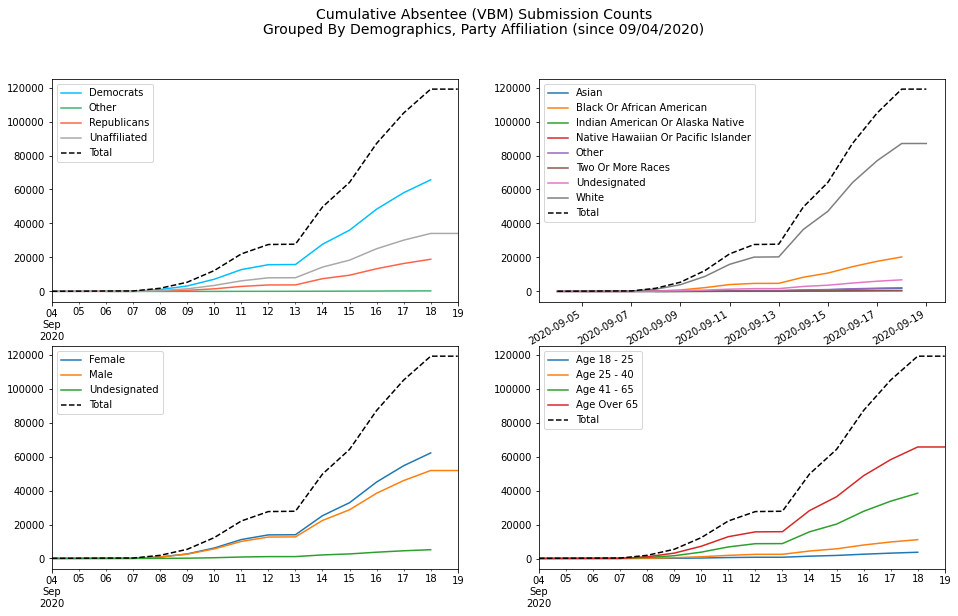

In [85]:
def plot_cumulative_abm_submissions(absentee):
    figure, axs = plt.subplots(2,2)
    axs = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
    ax_index = 0
    absentee_ = absentee[(absentee.ballot_rtn_dt >= '2020-09-04') & (absentee.ballot_rtn_dt <= pd.datetime.now())]
    absentee_ = absentee_[absentee_.age_group != np.isnan]
    col_types = ['party', 'race', 'gender', 'age_group']
    colors = {'Democrats': 'DeepSkyBlue', 'Republicans': 'Tomato', 'Unaffiliated': 'DarkGray', 'Other': 'mediumseagreen'}   
    for col_type in col_types: 
        try:
            labels = absentee_[col_type].unique().dropna() 
        except:
            labels = absentee_[col_type].unique()
        for group in np.sort(labels):
            grouped = absentee_[absentee_[col_type] == group].groupby('ballot_rtn_dt')
            cumulative = grouped.ballot_rtn_dt.count().cumsum()
            label = group.title()
            if col_type == 'age_group': 
                label = 'Age ' + label
            if col_type == 'party':
                cumulative.plot(label=label, color=colors[group], ax=axs[ax_index])
            else:
                cumulative.plot(label=label, ax=axs[ax_index])
        cumulative = absentee_.groupby('ballot_rtn_dt').ballot_rtn_dt.count().cumsum()
        cumulative.plot(label='Total', color='Black', ax=axs[ax_index], style='--')
        axs[ax_index].legend()
        axs[ax_index].set_xlabel('')
        ax_index += 1   
        figure.suptitle('Cumulative Absentee (VBM) Submission Counts\nGrouped By Demographics, Party Affiliation (since 09/04/2020)', fontsize=14)    
    return figure

fig = plot_cumulative_abm_submissions(absentee_2020)
fig.savefig('assets/images/statewide-vbm-submissions-by-demographic.png', bbox_inches='tight') 

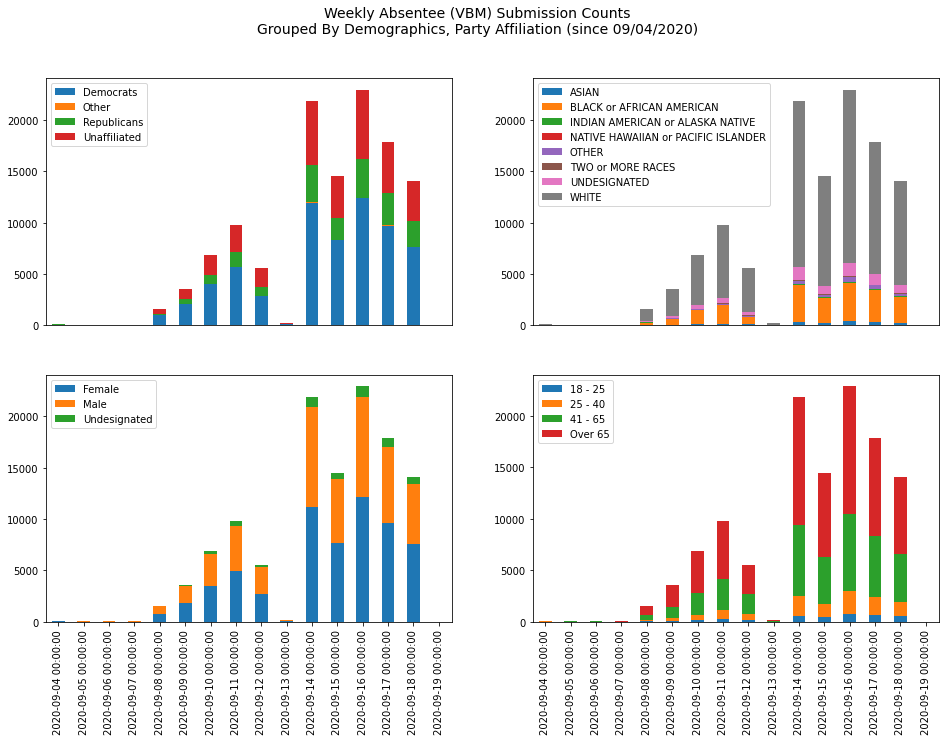

In [86]:
def plot_vm_submission_counts_by_week(absentee):
    col_types = ['party_desc', 'race_desc', 'gender_desc', 'age_range']
    figure, axs = plt.subplots(2,2)
    axs = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
    ax_index = 0
    
    absentee_ = absentee[(absentee.ballot_rtn_dt >= '2020-09-04') & (absentee.ballot_rtn_dt <= pd.datetime.now())]
    absentee_ = absentee_[absentee_.age_group != np.isnan]
    col_types = ['party', 'race', 'gender', 'age_group']
    
    for col_type in col_types:
        daily = absentee_.groupby('ballot_rtn_dt')
        summed = daily.apply(lambda v: v.groupby(col_type)['ballot_rtn_dt'].count())
        if isinstance(summed.index, pd.MultiIndex):
            summed.unstack().plot.bar(stacked=True, ax=axs[ax_index])
        else:
            summed.plot.bar(stacked=True, ax=axs[ax_index])
        axs[ax_index].legend()
        axs[ax_index].set_xlabel('')
        if ax_index < 2:
            axs[ax_index].set_xticks([])
        ax_index += 1    
    figure.suptitle('Weekly Absentee (VBM) Submission Counts\nGrouped By Demographics, Party Affiliation (since 09/04/2020)', fontsize=14)
    return figure

figure = plot_vm_submission_counts_by_week(absentee_2020)
figure.savefig('assets/images/statewide-vbm-submissions-by-demographic-weekly.png', bbox_inches='tight') 

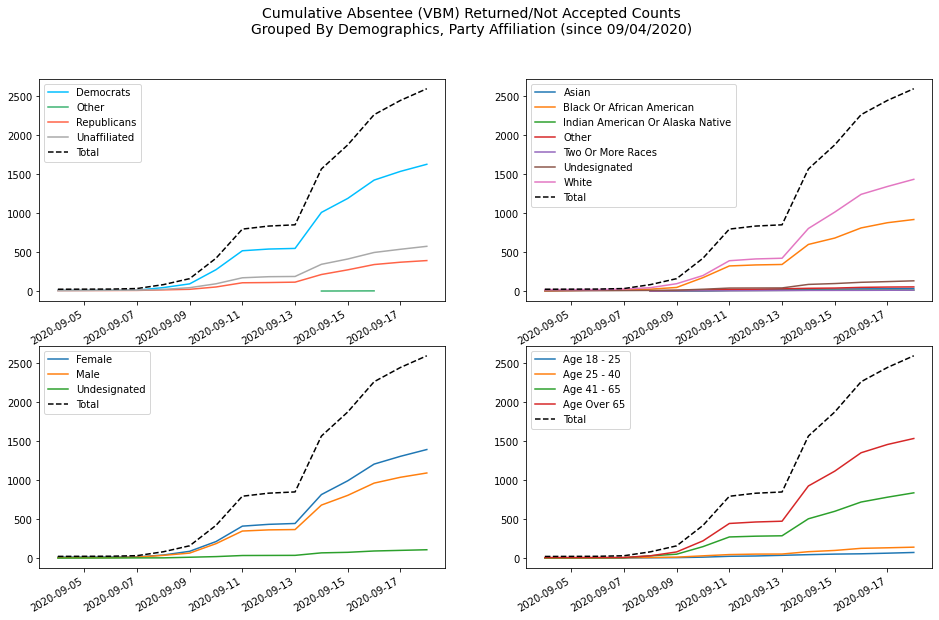

In [87]:
def plot_cumulative_abm_rejections(absentee):
    figure, axs = plt.subplots(2,2)
    axs = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
    ax_index = 0
    absentee_ = absentee[(absentee.ballot_rtn_dt >= '2020-09-04') & (absentee.ballot_rtn_dt <= pd.datetime.now())]
    absentee_ = absentee_[absentee_.age_group != np.isnan]
    absentee_ = absentee_[absentee.ballot_rtn_status != 'ACCEPTED']
    col_types = ['party', 'race', 'gender', 'age_group']
    colors = {'Democrats': 'DeepSkyBlue', 'Republicans': 'Tomato', 'Unaffiliated': 'DarkGray', 'Other': 'mediumseagreen'}   
    for col_type in col_types: 
        try:
            labels = absentee_[col_type].unique().dropna() 
        except:
            labels = absentee_[col_type].unique()
        for group in np.sort(labels):
            grouped = absentee_[absentee_[col_type] == group].groupby('ballot_rtn_dt')
            cumulative = grouped.ballot_rtn_dt.count().cumsum()
            label = group.title()
            if col_type == 'age_group': 
                label = 'Age ' + label
            if col_type == 'party':
                cumulative.plot(label=label, color=colors[group], ax=axs[ax_index])
            else:
                cumulative.plot(label=label, ax=axs[ax_index])
        cumulative = absentee_.groupby('ballot_rtn_dt').ballot_rtn_dt.count().cumsum()
        cumulative.plot(label='Total', color='Black', ax=axs[ax_index], style='--')
        axs[ax_index].legend()
        axs[ax_index].set_xlabel('')
        ax_index += 1   
        figure.suptitle('Cumulative Absentee (VBM) Returned/Not Accepted Counts\nGrouped By Demographics, Party Affiliation (since 09/04/2020)', fontsize=14)    
    return figure

fig = plot_cumulative_abm_rejections(absentee_2020)
fig.savefig('assets/images/statewide-vbm-rejected-by-demographic.png', bbox_inches='tight') 

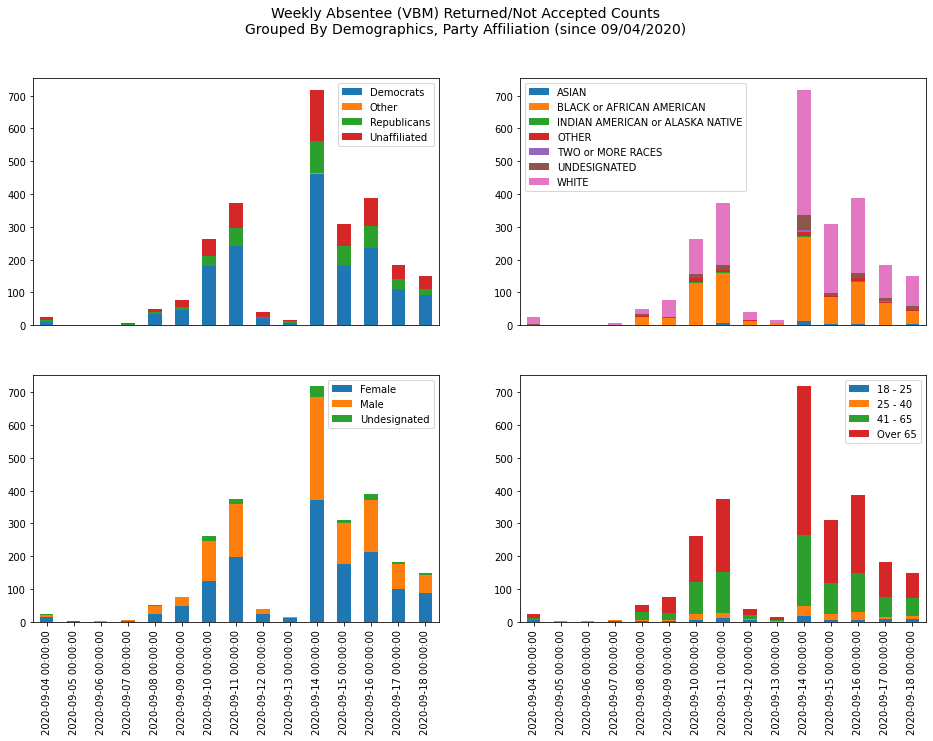

In [88]:
def plot_vm_rejected_counts_by_week(absentee):
    col_types = ['party_desc', 'race_desc', 'gender_desc', 'age_range']
    figure, axs = plt.subplots(2,2)
    axs = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
    ax_index = 0
    
    absentee_ = absentee[(absentee.ballot_rtn_dt >= '2020-09-04') & (absentee.ballot_rtn_dt <= pd.datetime.now())]
    absentee_ = absentee_[absentee_.age_group != np.isnan]
    absentee_ = absentee_[absentee_.ballot_rtn_status != 'ACCEPTED']
    col_types = ['party', 'race', 'gender', 'age_group']
    
    for col_type in col_types:
        daily = absentee_.groupby('ballot_rtn_dt')
        summed = daily.apply(lambda v: v.groupby(col_type)['ballot_rtn_dt'].count())
        if isinstance(summed.index, pd.MultiIndex):
            summed.unstack().plot.bar(stacked=True, ax=axs[ax_index])
        else:
            summed.plot.bar(stacked=True, ax=axs[ax_index])
        axs[ax_index].legend()
        axs[ax_index].set_xlabel('')
        if ax_index < 2:
            axs[ax_index].set_xticks([])
        ax_index += 1    
    figure.suptitle('Weekly Absentee (VBM) Returned/Not Accepted Counts\nGrouped By Demographics, Party Affiliation (since 09/04/2020)', fontsize=14)
    return figure

figure = plot_vm_rejected_counts_by_week(absentee_2020)
figure.savefig('assets/images/statewide-vbm-rejected-by-demographic-weekly.png', bbox_inches='tight') 

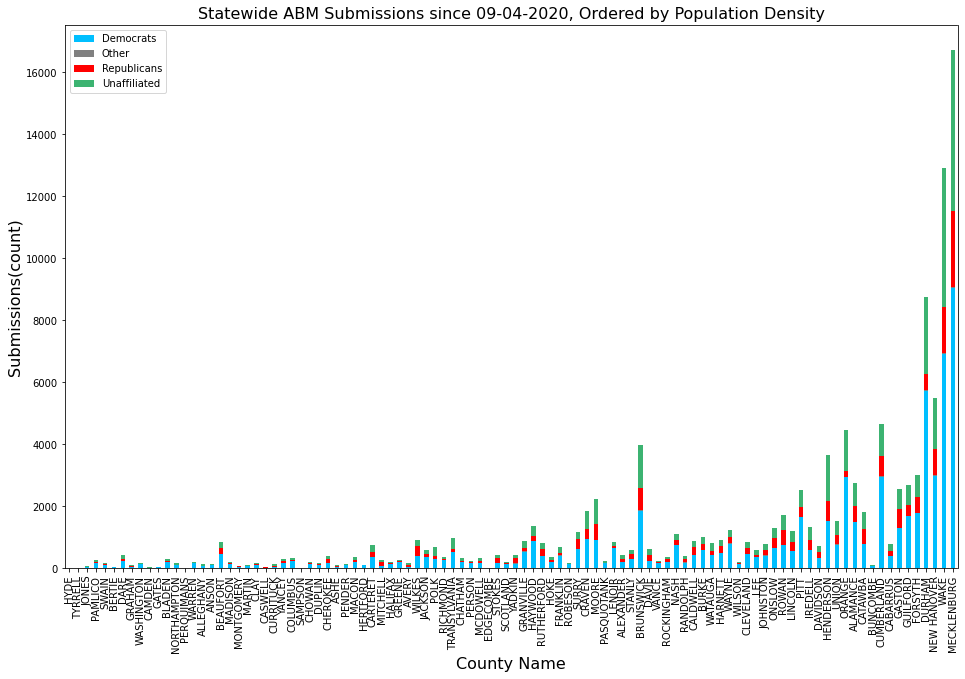

In [90]:
def plot_county_abm_submissions(absentee):
    dat = absentee.groupby('county_desc').apply(lambda g: g.groupby('party').ballot_rtn_dt.count()).reset_index().pivot(index='county_desc', columns='party', values='ballot_rtn_dt')
    sort_col = 'cvap.density(count/squaremiles)'
    dat = dat.join(density, how='right').sort_values(sort_col).fillna(0)
    fontsize=16
    ax = dat.drop(columns=[sort_col]).plot.bar(stacked=True, color=['DeepSkyBlue', 'Gray', 'Red', 'mediumseagreen'])
    ax.set_title('Statewide ABM Submissions since 09-04-2020, Ordered by Population Density', fontsize=fontsize)
    ax.set_ylabel('Submissions(count)', fontsize=fontsize)
    ax.set_xlabel('County Name', fontsize=fontsize)
    return ax

fig = plot_county_abm_submissions(absentee_2020)
fig.get_figure().savefig('assets/images/statewide-vbm-submissions-by-county.png', bbox_inches='tight')

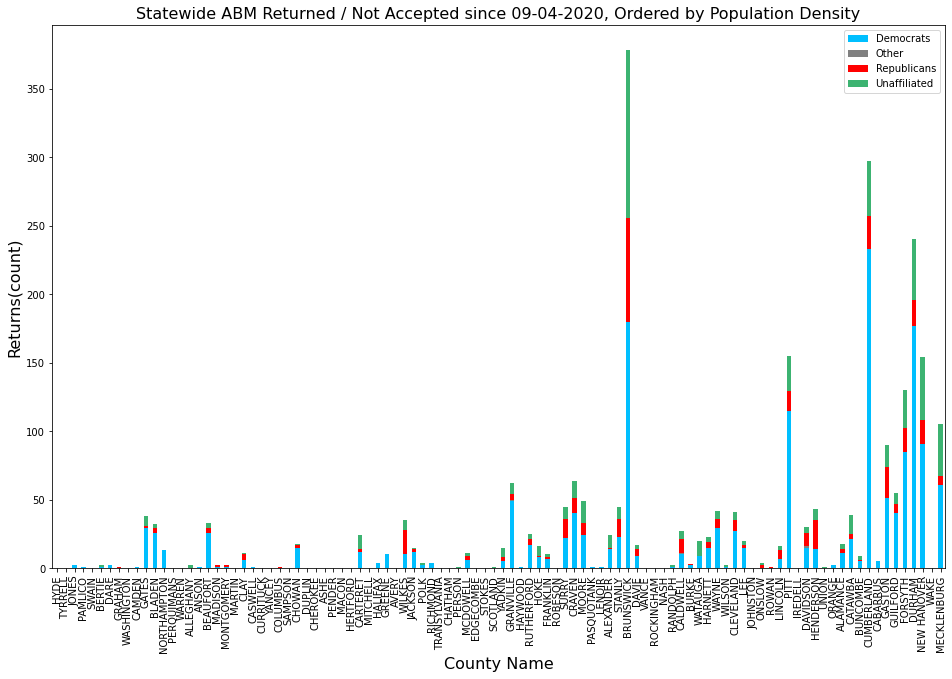

In [91]:
def plot_county_abm_rejections(absentee):
    dat = absentee[absentee.ballot_rtn_status != 'ACCEPTED'].groupby('county_desc').apply(lambda g: g.groupby('party').ballot_rtn_dt.count()).reset_index().pivot(index='county_desc', columns='party', values='ballot_rtn_dt')
    sort_col = 'cvap.density(count/squaremiles)'
    dat = dat.join(density, how='right').sort_values(sort_col).fillna(0)
    fontsize=16
    ax = dat.drop(columns=[sort_col]).plot.bar(stacked=True, color=['DeepSkyBlue', 'Gray', 'Red', 'mediumseagreen'])
    ax.set_title('Statewide ABM Returned / Not Accepted since 09-04-2020, Ordered by Population Density', fontsize=fontsize)
    ax.set_ylabel('Returns(count)', fontsize=fontsize)
    ax.set_xlabel('County Name', fontsize=fontsize)
    return ax

fig = plot_county_abm_rejections(absentee_2020)
fig.get_figure().savefig('assets/images/statewide-vbm-rejections-by-county.png', bbox_inches='tight')

In [196]:
absentee_2020.ballot_rtn_status.value_counts()

ACCEPTED                   116487
WITNESS INFO INCOMPLETE      1601
SPOILED                       747
PENDING                       130
PENDING CURE                   57
RETURNED UNDELIVERABLE         38
SIGNATURE DIFFERENT             8
CONFLICT                        7
ACCEPTED - CURED                7
DUPLICATE                       4
Name: ballot_rtn_status, dtype: int64

In [101]:
ls -lah ~/Downloads/ZIP_Code_Tabulation_Areas-shp/ZIP_Code_Tabulation_Areas.shp

-rw-r--r--@ 1 mookerji  staff   2.6M Sep 20 03:31 /Users/mookerji/Downloads/ZIP_Code_Tabulation_Areas-shp/ZIP_Code_Tabulation_Areas.shp


## Mecklenburg County

In [144]:
zips = pd.read_csv('data/zipcodes/mecklenburg.txt', header=None)
zips.columns = ['zips']
zips.set_index('zips', inplace=True)
zip_codes = gpd.read_file('/Users/mookerji/Downloads/ZIP_Code_Tabulation_Areas-shp/ZIP_Code_Tabulation_Areas.shp')
zip_codes.index = zip_codes['ZCTA5CE10'].astype('int')
meck_zips = gpd.GeoDataFrame(zips.join(zip_codes))
meck_zips['name'] = meck_zips.index
meck_zips.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 35 entries, 28031 to 28278
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    34 non-null     float64 
 1   ZCTA5CE10   34 non-null     object  
 2   AFFGEOID10  34 non-null     object  
 3   GEOID10     34 non-null     object  
 4   ALAND10     34 non-null     float64 
 5   AWATER10    34 non-null     float64 
 6   ShapeSTAre  34 non-null     float64 
 7   ShapeSTLen  34 non-null     float64 
 8   geometry    34 non-null     geometry
 9   name        35 non-null     int64   
dtypes: float64(5), geometry(1), int64(1), object(3)
memory usage: 3.0+ KB


In [145]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
with fiona.drivers():
    meck_zips[['name', 'GEOID10', 'geometry']].to_file('data/shapefiles/meck-zips.kml', driver='KML')

In [138]:
gpd.GeoDataFrame(meck_zips).info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 35 entries, 28031 to 28278
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    34 non-null     float64 
 1   ZCTA5CE10   34 non-null     object  
 2   AFFGEOID10  34 non-null     object  
 3   GEOID10     34 non-null     object  
 4   ALAND10     34 non-null     float64 
 5   AWATER10    34 non-null     float64 
 6   ShapeSTAre  34 non-null     float64 
 7   ShapeSTLen  34 non-null     float64 
 8   geometry    34 non-null     geometry
dtypes: float64(5), geometry(1), object(3)
memory usage: 2.7+ KB


In [153]:
districts = pd.read_csv('data/districts/mecklenburg.txt', header=None)
districts.columns = ['districts']
districts.set_index('districts', inplace=True)
districts

Empty DataFrame
Columns: []
Index: [100, 101, 102, 103, 104, 105, 106, 107, 88, 92, 98, 99]

In [187]:
meck_districts = nc_districts.loc[districts.index.map(str)]
meck_districts['name'] = meck_districts.index
meck_districts

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
with fiona.drivers():
    meck_districts.to_file('data/shapefiles/meck-districts.kml', driver='KML')

In [186]:
nc_districts.loc[districts.index.map(str)]

geometry
districts                                                   
100        POLYGON ((449738.667 158046.383, 449647.346 15...
101        POLYGON ((439708.306 179893.560, 439713.314 17...
102        POLYGON ((440674.775 167933.255, 440680.915 16...
103        POLYGON ((448171.776 147283.121, 448169.709 14...
104        POLYGON ((446079.686 157273.163, 446159.194 15...
105        POLYGON ((438946.293 144349.573, 438871.700 14...
106        POLYGON ((446460.292 171055.194, 446460.606 17...
107        POLYGON ((435787.313 177276.866, 435845.993 17...
88         POLYGON ((444453.121 161517.980, 444421.990 16...
92         POLYGON ((434559.980 150475.910, 434559.003 15...
98         POLYGON ((431974.368 184964.521, 431931.583 18...
99         POLYGON ((452752.878 164366.482, 452817.738 16...

In [191]:
one_stop_counties = pd.read_csv('data/one-stop-absentee.csv')
one_stop_counties[one_stop_counties.County == 'MECKLENBURG'].to_csv('data/one-stop-absentee-mecklenburg.csv', index=False)

In [192]:
limbo/voter_precinct/Voter_Precinct.shp

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [194]:
locations = gpd.read_file('limbo/voter_polling_location/Voter_Polling_Location.shp')
locations

precno                                  name          city  zone  \
0       1.0       WESTMINSTER PRESBYTERIAN CHURCH     CHARLOTTE   5.0   
1       3.0           COCHRANE COLLEGIATE ACADEMY     CHARLOTTE  12.0   
2       5.0             THIRD PRESBYTERIAN CHURCH     CHARLOTTE  12.0   
3       7.0                RANDOLPH MIDDLE SCHOOL     CHARLOTTE   5.0   
4       8.0          MYERS PARK ELEMENTARY SCHOOL     CHARLOTTE  11.0   
..      ...                                   ...           ...   ...   
190   237.0  UNIVERSITY MEADOWS ELEMENTARY SCHOOL     CHARLOTTE   3.0   
191   238.0      DAVID COX ROAD ELEMENTARY SCHOOL     CHARLOTTE   3.0   
192   241.0           J M ALEXANDER MIDDLE SCHOOL  HUNTERSVILLE   1.0   
193   242.0                           JETTON PARK     CORNELIUS   1.0   
194   243.0     PLEASANT HILL PRESBYTERIAN CHURCH     CHARLOTTE   6.0   

                address                   type  \
0       101 COLVILLE RD             Restricted   
1     6200 STARHAVEN DR  Campaigning Permitted   
2      4019 CENTRAL AVE             Restricted   
3     4400 WATER OAK RD  Campaigning Permitted   
4    2132 RADCLIFFE AVE  Campaigning Permitted   
..                  ...                    ...   
190  1600 PAVILION BLVD  Campaigning Permitted   
191   4215 DAVID COX RD  Campaigning Permitted   
192  12201 HAMBRIGHT RD  Campaigning Permitted   
193     19000 JETTON RD  Campaigning Permitted   
194       15000 YORK RD             Restricted   

                                              location  \
0         WESTMINSTER PRESBYTERIAN CHURCH - BEARD HALL   
1                    COCHRANE COLLEGIATE ACADEMY - GYM   
2           THIRD PRESBYTERIAN CHURCH- FELLOWSHIP HALL   
3                RANDOLPH MIDDLE SCHOOL - MEDIA CENTER   
4                   MYERS PARK ELEMENTARY SCHOOL - GYM   
..                                                 ...   
190         UNIVERSITY MEADOWS ELEMENTARY SCHOOL - GYM   
191  DAVID COX ROAD ELEMENTARY SCHOOL - MULTI-PURPO...   
192   J M ALEXANDER MIDDLE SCHOOL - MULTI-PURPOSE ROOM   
193                      JETTON PARK - WATERFRONT HALL   
194            PLEASANT HILL PRESBYTERIAN CHURCH - GYM   

                           geometry  
0    POINT (1456933.997 533972.000)  
1    POINT (1477458.997 549225.000)  
2    POINT (1469444.997 538171.000)  
3    POINT (1463839.997 526789.000)  
4    POINT (1452005.997 529379.000)  
..                              ...  
190  POINT (1488565.997 574154.000)  
191  POINT (1462941.997 582291.000)  
192  POINT (1452881.997 597811.000)  
193  POINT (1434769.997 633479.000)  
194  POINT (1395583.997 495459.000)  

[195 rows x 8 columns]

# Shifts 